# 응용통계학
> final term

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics]

In [ ]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

위에서 데이터를 하나 선정하여 (가능하면 중간평가 때 사용했던 데이터 그대로 사용)

1. 반응변수를 적당한 구간으로 이진화하여라 (0과 1로 만들라는 의미)

2. 로지스틱 회귀모형을 적합하고 해석 및 평가하여라.

3. probit, cloglog 링크를 이용하여 모형을 적합하여 보고 로지스틱과 비교하여 어떤지 살펴보아라.

4. 원 반응변수에 설명변수를 하나 선택하여 커널 추정량을 계산하여라.

5. 국소상수, 국소선형 추정량을 각각 적합하고 평가하여라.

- 데이터는 꼭 위 링크에서 선정하지 않고 다른 데이터를 사용하여도 무방함

- R 뿐 아니라 다른 tool을 이용하여도 무방함.

- 분석과정 및 결과/해석 등을 문서로 정리하여 제출 (소스코드 포함) 

## Import

In [50]:
library(ggplot2)
library(faraway)
library(np)

## Data

In [3]:
df = read.csv('Real_estate_valuation_data_set.csv')

In [4]:
head(df)

,No,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [5]:
colnames(df) <- c('No','X1','X2','X3','X4','X5','X6','Y')

In [6]:
head(df)

,No,X1,X2,X3,X4,X5,X6,Y
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


## 1. 반응변수를 적당한 구간으로 이진화하여라 (0과 1로 만들라는 의미)

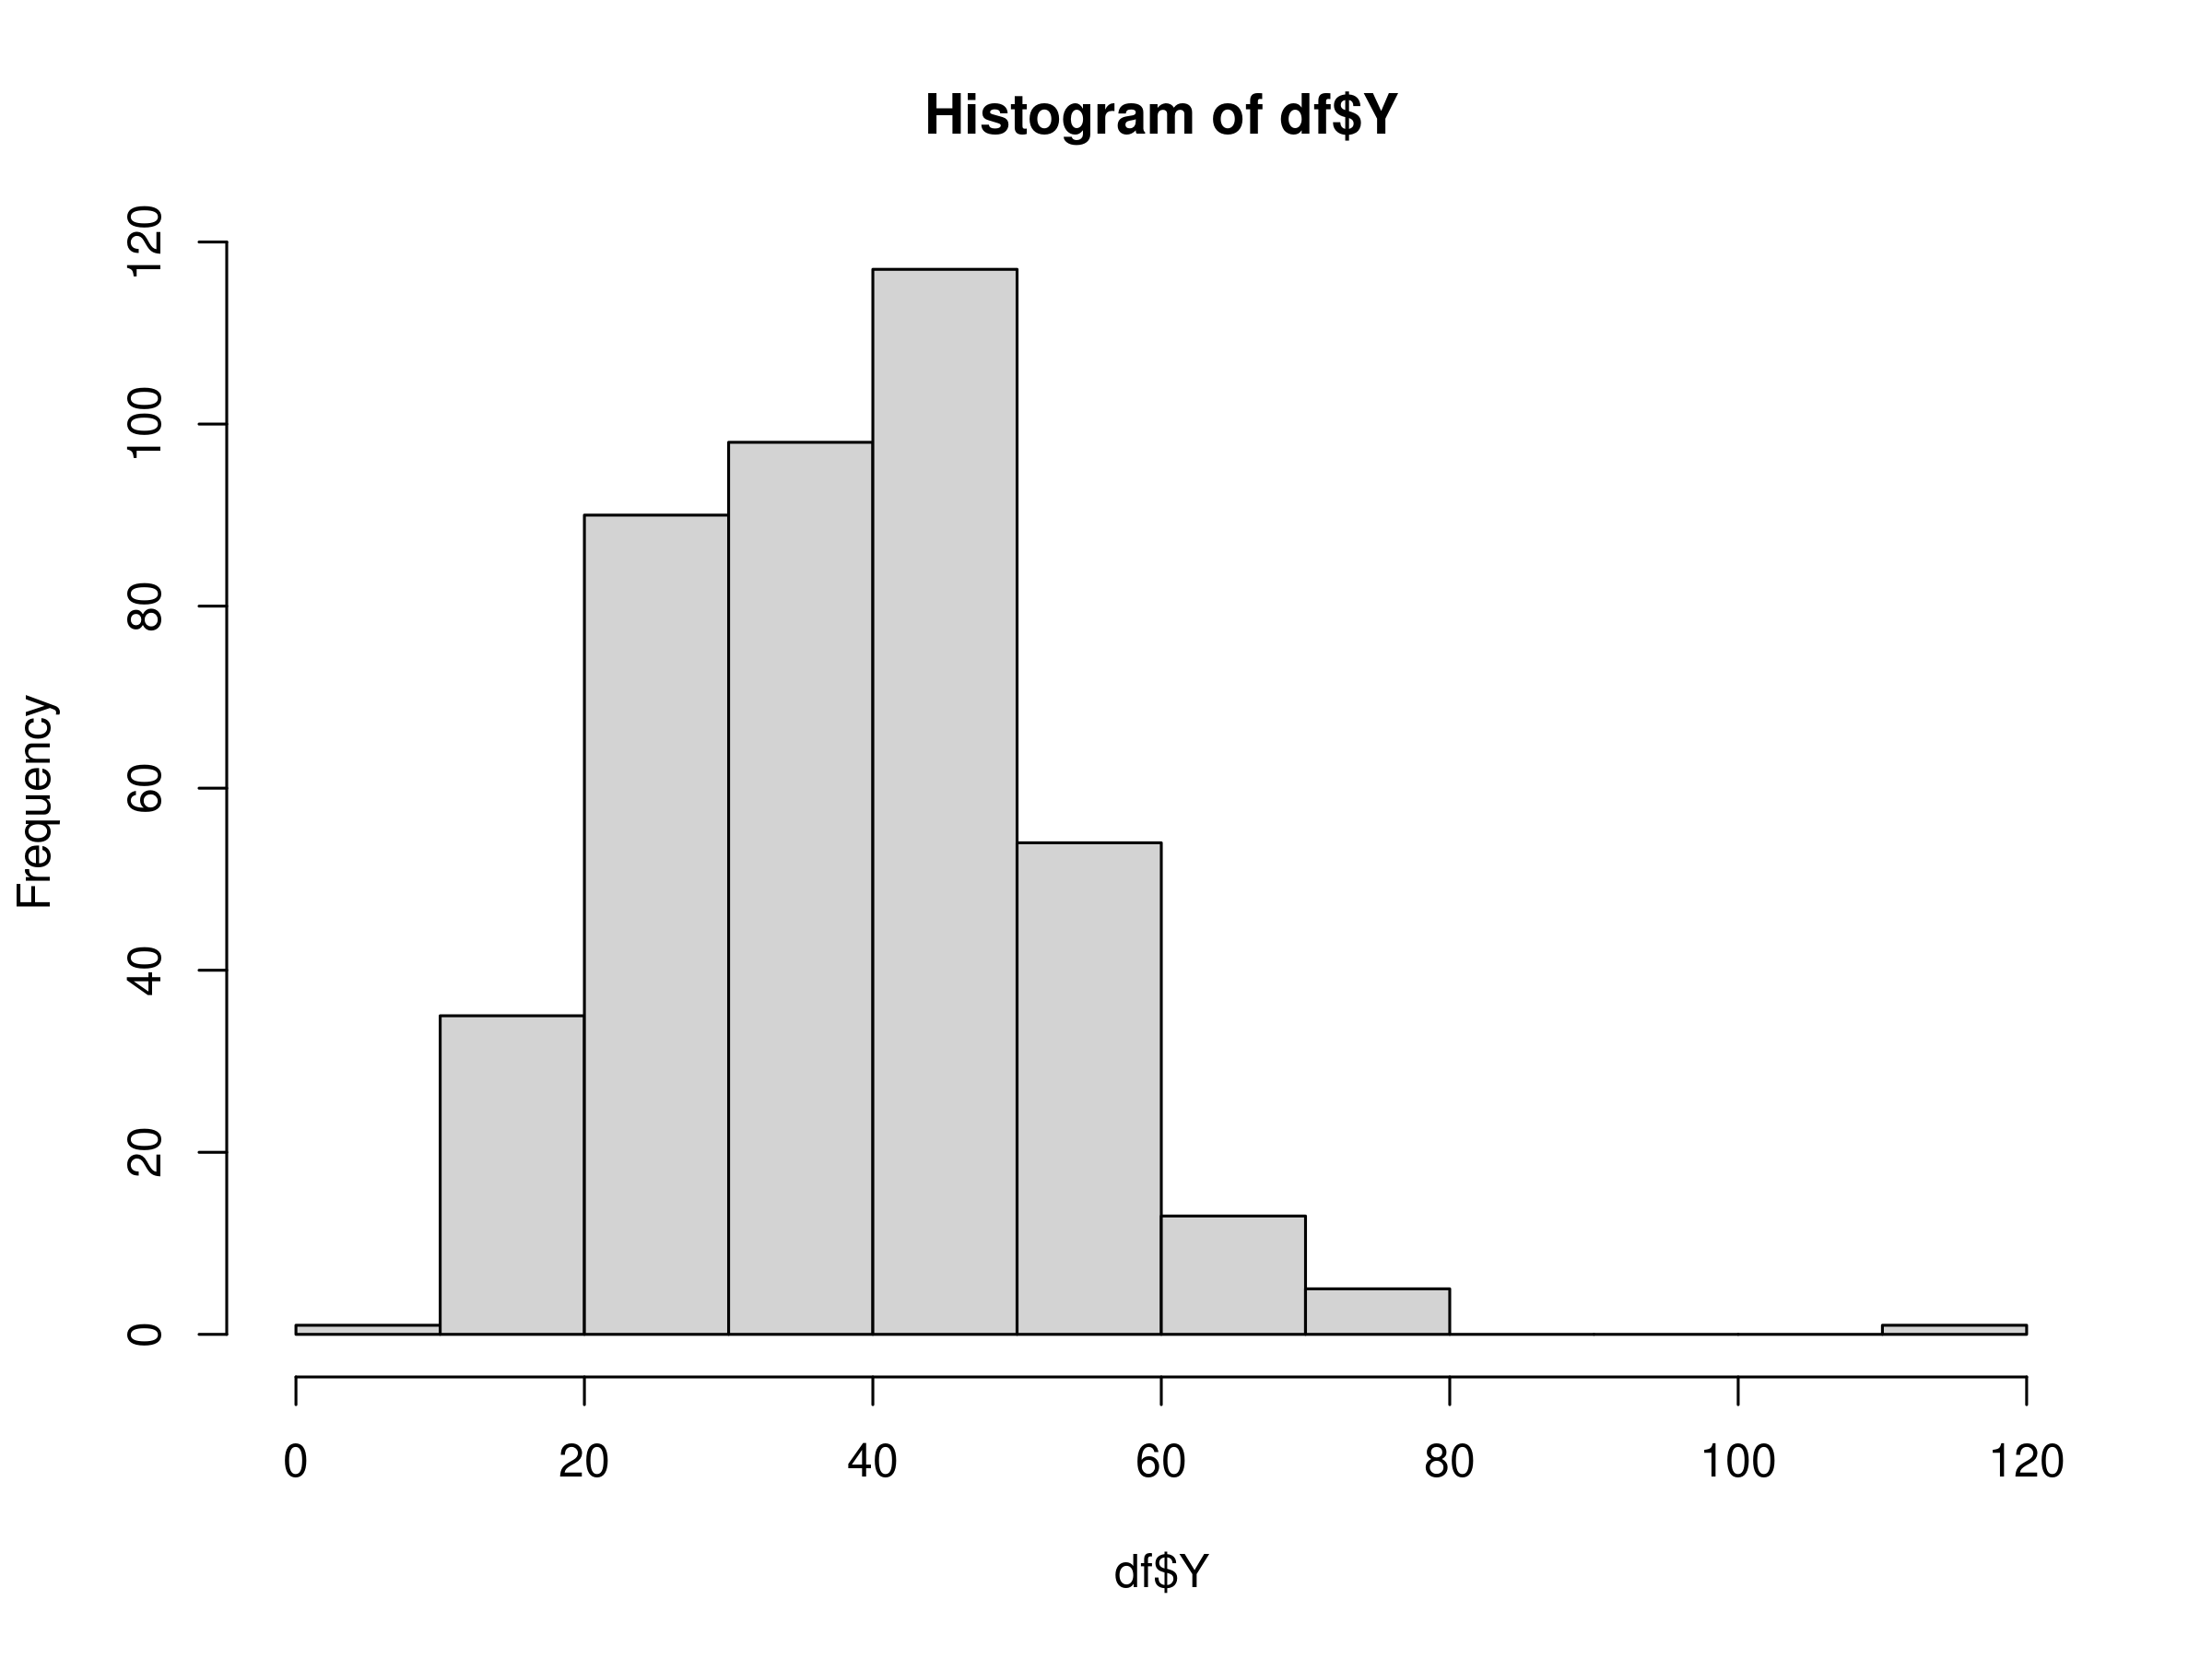

In [7]:
hist(df$Y)

In [8]:
summary(df$Y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.60   27.70   38.45   37.98   46.60  117.50 

In [9]:
df$Y1<-ifelse(df$Y>mean(df$Y),1,0)

평균보다 크면 1로, 작으면 0으로 이진화하였다.

In [10]:
head(df)

,No,X1,X2,X3,X4,X5,X6,Y,Y1
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9,0
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2,1
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3,1
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8,1
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1,1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1,0


## 2. 로지스틱 회귀모형을 적합하고 해석 및 평가하여라.

In [11]:
lmod1 <- glm(Y1 ~ X2 + X3 + X4 + X5, family = binomial, df)
summary(lmod1)


Call:
glm(formula = Y1 ~ X2 + X3 + X4 + X5, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4314  -0.3413   0.2427   0.5643   4.5614  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.076e+03  4.340e+02  -4.782 1.74e-06 ***
X2          -5.879e-02  1.253e-02  -4.694 2.69e-06 ***
X3          -2.155e-03  3.562e-04  -6.051 1.44e-09 ***
X4           2.093e-01  6.373e-02   3.284  0.00102 ** 
X5           8.319e+01  1.738e+01   4.786 1.70e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 299.90  on 409  degrees of freedom
AIC: 309.9

Number of Fisher Scoring iterations: 7


In [12]:
lmod2 <- glm(Y1 ~ X1 + X2 + X3 + X4, family = binomial, df)
summary(lmod2)


Call:
glm(formula = Y1 ~ X1 + X2 + X3 + X4, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1894  -0.4941   0.2324   0.6004   3.7911  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.414e+03  1.055e+03  -2.288 0.022115 *  
X1           1.200e+00  5.241e-01   2.290 0.022014 *  
X2          -5.423e-02  1.238e-02  -4.381 1.18e-05 ***
X3          -2.313e-03  3.267e-04  -7.080 1.44e-12 ***
X4           2.128e-01  6.007e-02   3.543 0.000395 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 320.33  on 409  degrees of freedom
AIC: 330.33

Number of Fisher Scoring iterations: 6


중간평가 때 고려했던 바와 같이 설명변수를 넣는 방법을 두 가지로 보고 모형 설정을 해보았다.
- 설명변수 정보
    - `X1` transaction date
    - `X2` house age
    - `X3` distance to the nearest MRT station
    - `X4` number of convenience stores
    - `X5` latitude
    - `X6` longitude
    - `Y` house price of unit area

모형1(`Y = X2 + X3 + X4 + X5`)
- $Y = (-2.076e+03 ) + (-5.879e-02) X_2 + (-2.155e-03) X_3 +  (2.093e-01) X_4 + (8.319e+01) X_5$
- 위도(X5)가 높을수록 집값이 증가하는 경향을 보였다.

모형2(`Y = X1 + X2 + X3 + X4`)
- $Y = (-2.414e+03) + (1.200e+00)X_1 + (-5.423e-02)X_2 + (-2.313e-03)X_3 + (2.128e-01)X_4$
- transaction date(X1)가 최근일(높을)수록 집값이 증가하는 경향을 보였다.

모형1, 모형2 공통: 모형 적합을 해본 결과, 두 모형 모두 
- 집을 지은지 오래될수록(X2) 집값이 감소하는 경향을 보였다.
- 가장 가까운 지하철 역까지의 거리(X3)가 멀수록, 집값이 감소하는 경향을 보였다. 
- 편의점이 집 주변에 많을수록(X4) 집값이 상승하는 경향을 보였다.

```r
Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 299.90  on 409  degrees of freedom
AIC: 309.9
```
$\uparrow$ 모형 1
- Null deviance에 비해 Residual deviance가 `273.55(=573.45 - 299.90)` 만큼 감소했다.

```r
Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 320.33  on 409  degrees of freedom
AIC: 330.33
```
$\uparrow$ 모형 2
- Null deviance에 비해 Residual deviance가 `253.12(=573.45 - 320.33)` 만큼 감소했다.

**모형 1의 AIC 309.9보다 모형 2의 AIC 330.33이 값이 커 모형 1이 더 좋은 모형인 것 같다.**

**모형 1의 Residual deviance 299.90보다 모형 2의 Residual deviance 320.33이 높아 모형 1이 더 적합도가 좋은 모형인 것 같다.**

## 3. probit, cloglog 링크를 이용하여 모형을 적합하여 보고 로지스틱과 비교하여 어떤지 살펴보아라.

**2에서 더 좋은 모형이라고 판단한 모델 1을 사용하여 비교하였다.**

In [13]:
lmod_l <- glm(Y1 ~ X2 + X3 + X4 + X5, family = binomial, df)
lmod_c <- glm(Y1 ~ X2 + X3 + X4 + X5, family = binomial(link = cloglog), df)
lmod_p <- glm(Y1 ~ X2 + X3 + X4 + X5, family = binomial(link = probit), df)

In [14]:
summary(lmod_l)


Call:
glm(formula = Y1 ~ X2 + X3 + X4 + X5, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4314  -0.3413   0.2427   0.5643   4.5614  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.076e+03  4.340e+02  -4.782 1.74e-06 ***
X2          -5.879e-02  1.253e-02  -4.694 2.69e-06 ***
X3          -2.155e-03  3.562e-04  -6.051 1.44e-09 ***
X4           2.093e-01  6.373e-02   3.284  0.00102 ** 
X5           8.319e+01  1.738e+01   4.786 1.70e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 299.90  on 409  degrees of freedom
AIC: 309.9

Number of Fisher Scoring iterations: 7


In [15]:
summary(lmod_c)


Call:
glm(formula = Y1 ~ X2 + X3 + X4 + X5, family = binomial(link = cloglog), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9394  -0.3870   0.0448   0.5380   3.9871  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.245e+03  2.633e+02  -4.730 2.24e-06 ***
X2          -3.981e-02  7.578e-03  -5.253 1.50e-07 ***
X3          -1.678e-03  2.542e-04  -6.604 4.01e-11 ***
X4           1.332e-01  3.847e-02   3.462 0.000537 ***
X5           4.991e+01  1.054e+01   4.733 2.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 289.21  on 409  degrees of freedom
AIC: 299.21

Number of Fisher Scoring iterations: 7


In [16]:
summary(lmod_p)


Call:
glm(formula = Y1 ~ X2 + X3 + X4 + X5, family = binomial(link = probit), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3804  -0.4963   0.2251   0.6092   5.2087  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.822e+02  2.192e+02  -4.481 7.42e-06 ***
X2          -3.293e-02  6.842e-03  -4.813 1.49e-06 ***
X3          -9.320e-04  1.518e-04  -6.139 8.32e-10 ***
X4           1.366e-01  3.456e-02   3.954 7.70e-05 ***
X5           3.937e+01  8.777e+00   4.485 7.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 314.23  on 409  degrees of freedom
AIC: 324.23

Number of Fisher Scoring iterations: 7


```r
Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 299.90  on 409  degrees of freedom
AIC: 309.9
```
$\uparrow$ 로지스틱

```r
Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 289.21  on 409  degrees of freedom
AIC: 299.21
```
$\uparrow$ cloglog

```r
Null deviance: 573.45  on 413  degrees of freedom
Residual deviance: 314.23  on 409  degrees of freedom
AIC: 324.23
```
$\uparrow$ probit

- 세 방법으로 모형을 적합하였을때, `cloglog` link를 적용한 모형이 Residual deviance가 `289.21`로 가장 낮아 적합도가 제일 높았고, 로지스틱과 Residual deviance의 차이가 309.9 - 299.21 = `10.69` 이었다.
- `probit` link를 적용한 모형의 Residual deviance는 `314.23`으로 높아 로지스틱보다 적합도가 오히려 낮았다.

## 4. 원 반응변수에 설명변수를 하나 선택하여 커널 추정량을 계산하여라.

**1) 설명변수 X3(가장 가까운 지하철 역까지의 거리)만 선택하여 모형 적합**

In [17]:
lmod111 <- glm(Y1 ~ X3, family = binomial, df)
beta111<-coef(lmod111)

In [18]:
beta111

(Intercept)           X3 
 2.122557406 -0.002707763

In [19]:
summary(df$X3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.38  289.32  492.23 1083.89 1454.28 6488.02 

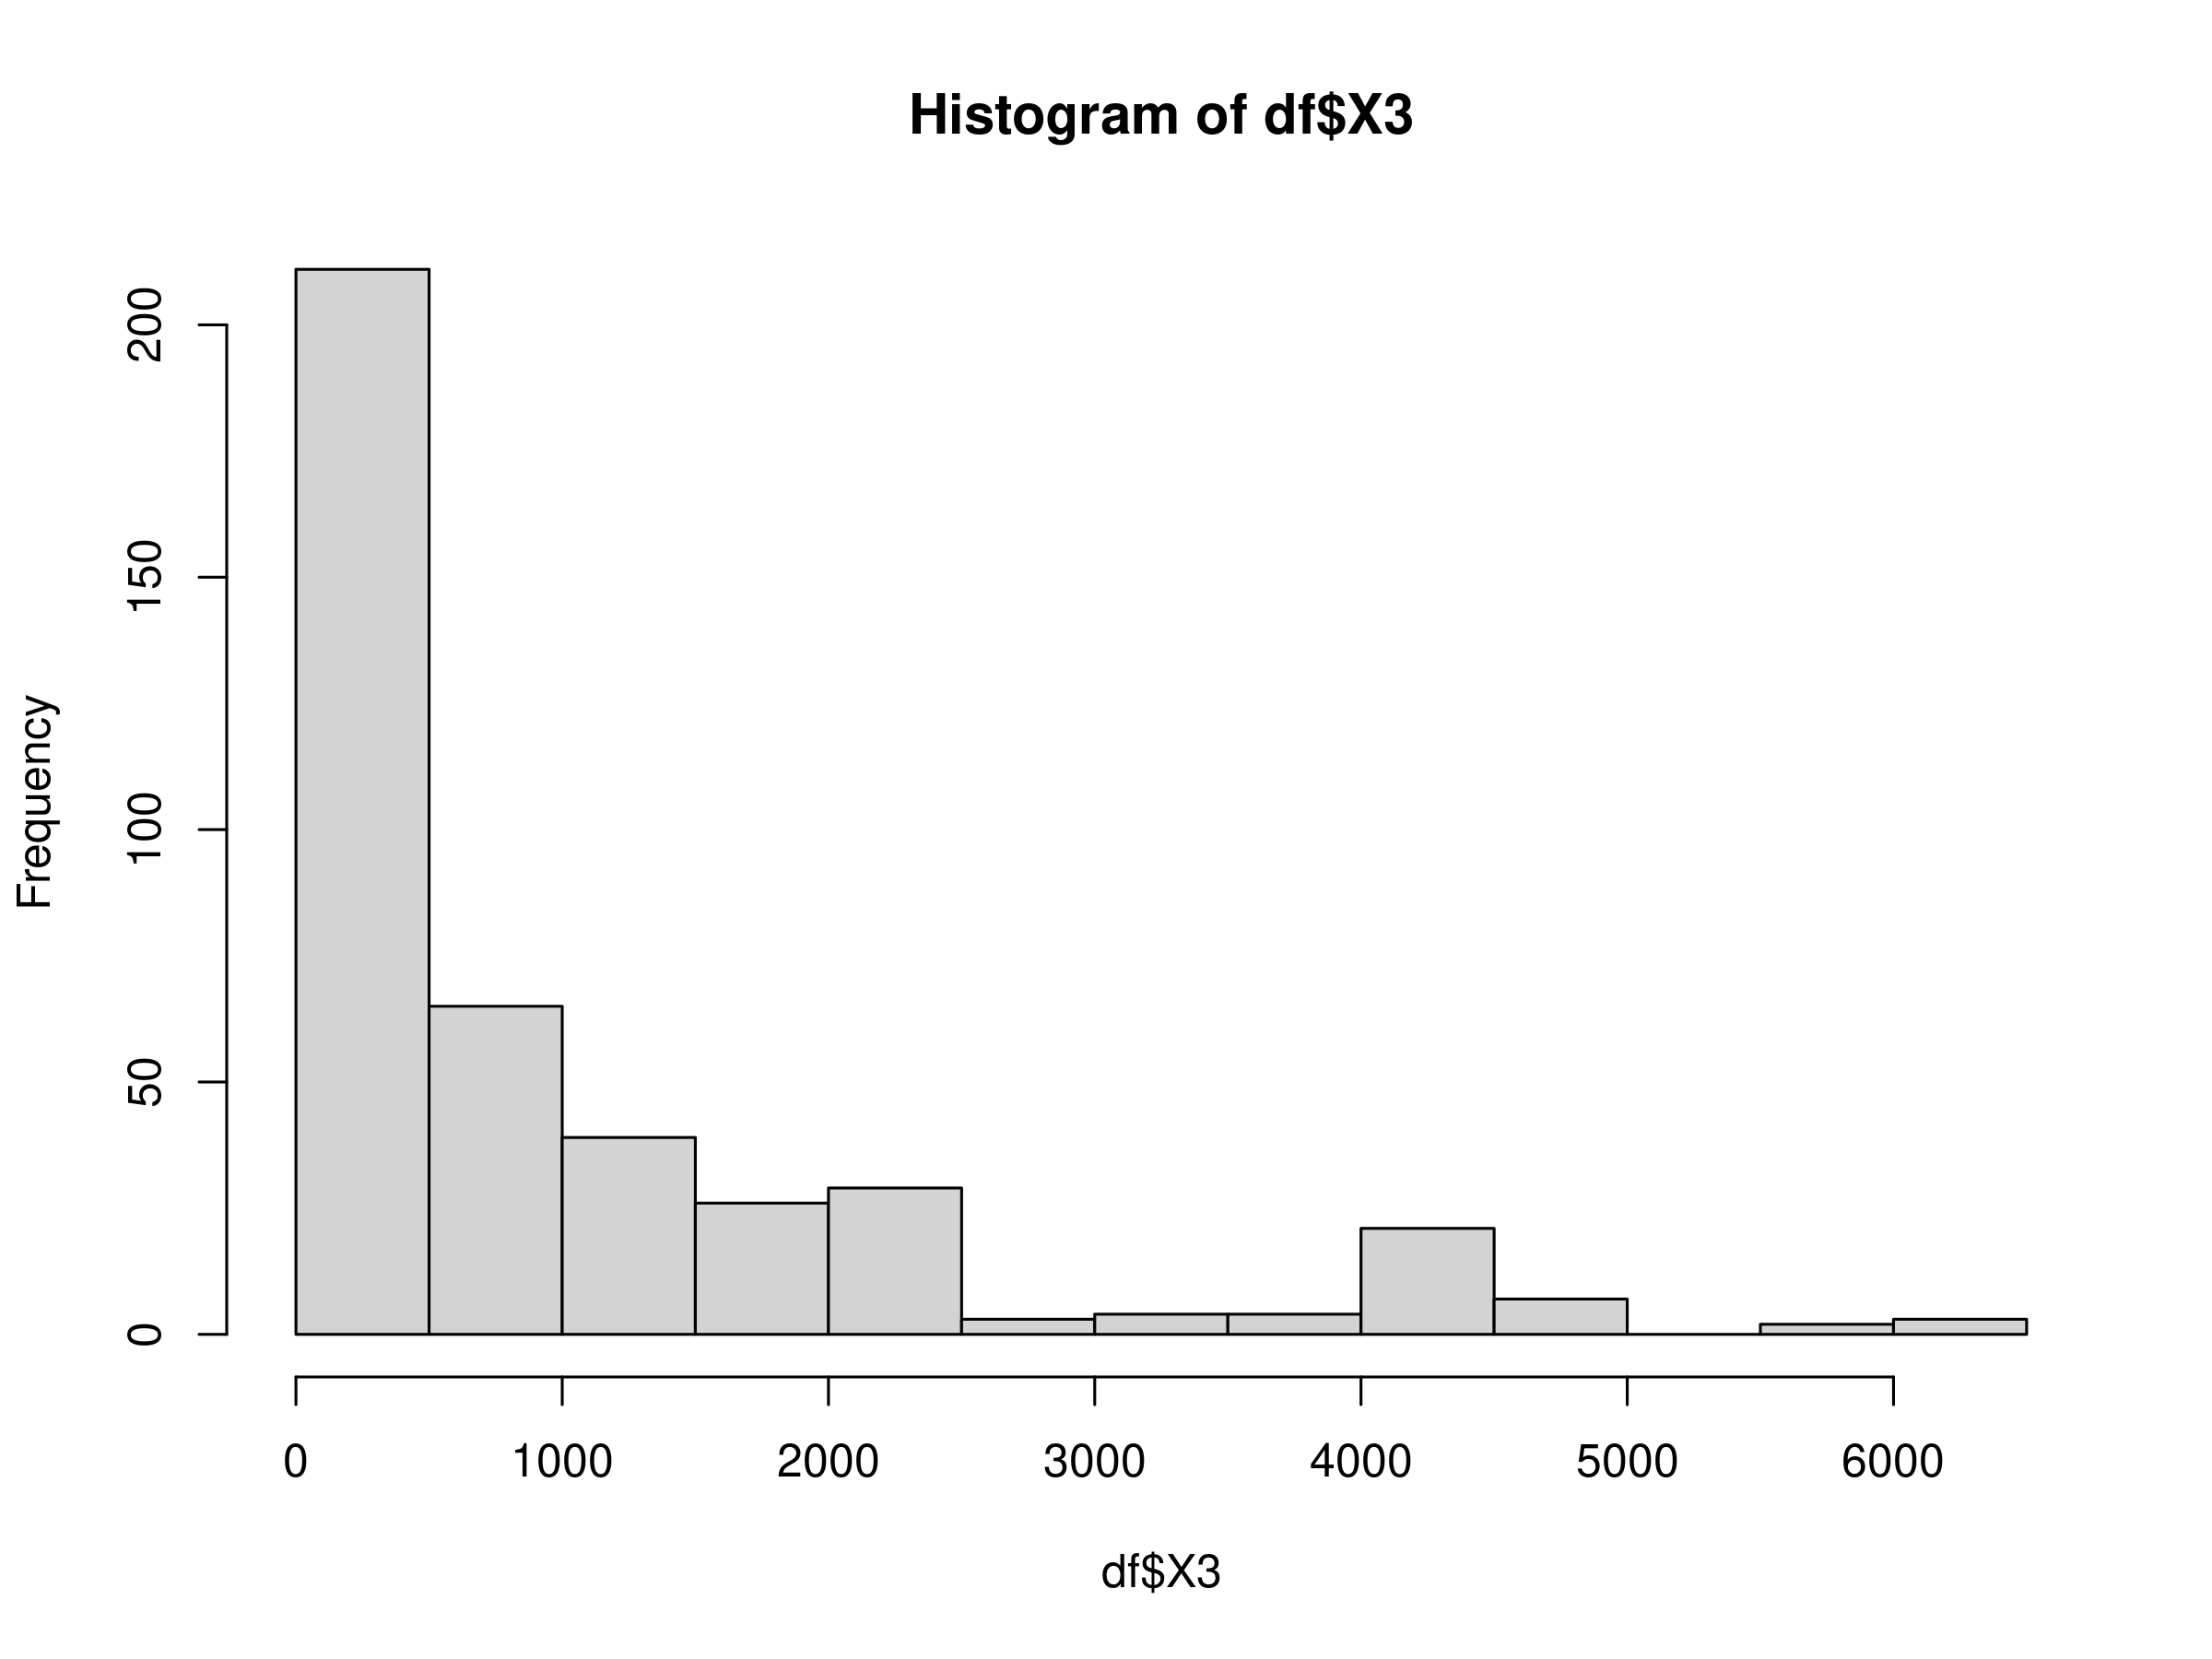

In [20]:
hist(df$X3)

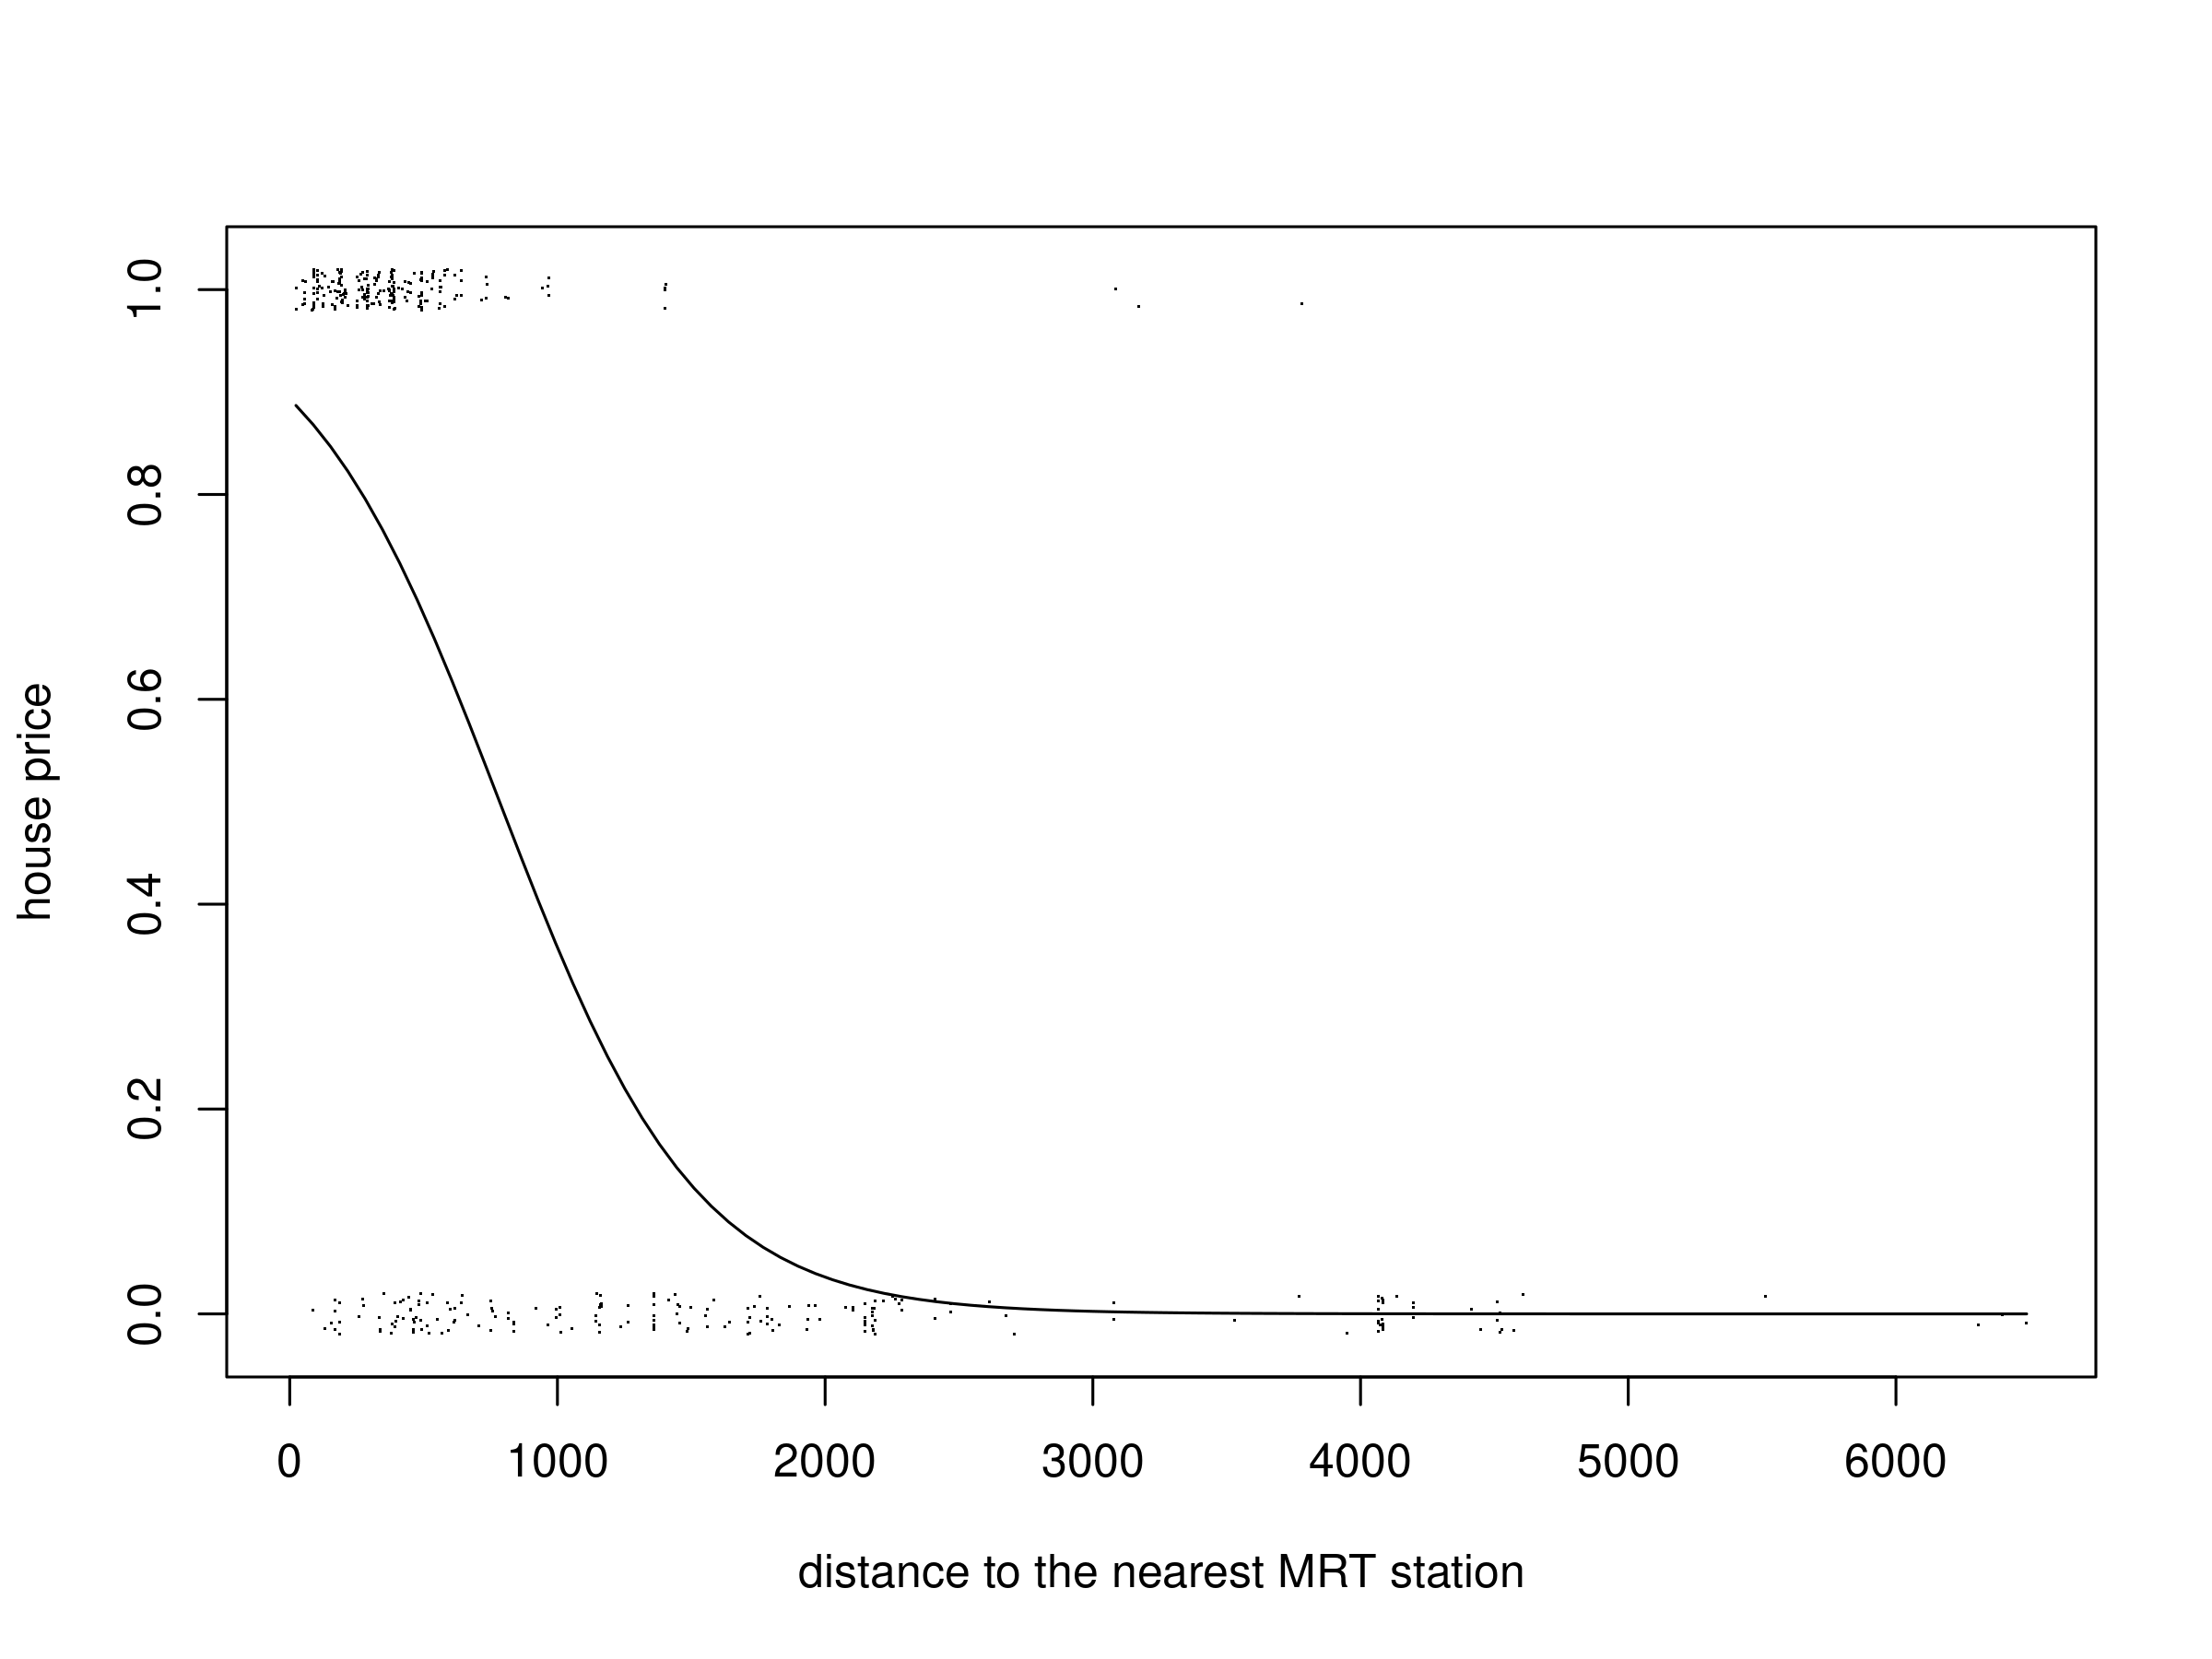

In [21]:
plot(jitter(Y1,0.1) ~ jitter(X3), df, xlab="distance to the nearest MRT station", ylab="house price",pch=".")
curve(ilogit(beta111[1] + beta111[2]*x),add=TRUE)    

- 집과 가장 가까운 지하철 역의 거리가 멀수록 집값이 떨어지는 경향을 보인다.

X3의 평균값을 넣어준 추정량

In [22]:
ilogit(sum(beta111*c(1,mean(df$X3))))

[1] 0.3073903

**2) 2번에서 선택한 모형 1을 사용하고 설명변수 X3를 선택**

In [23]:
beta<-coef(lmod1)
beta

(Intercept)            X2            X3            X4            X5 
-2.075518e+03 -5.879095e-02 -2.155451e-03  2.093119e-01  8.319231e+01

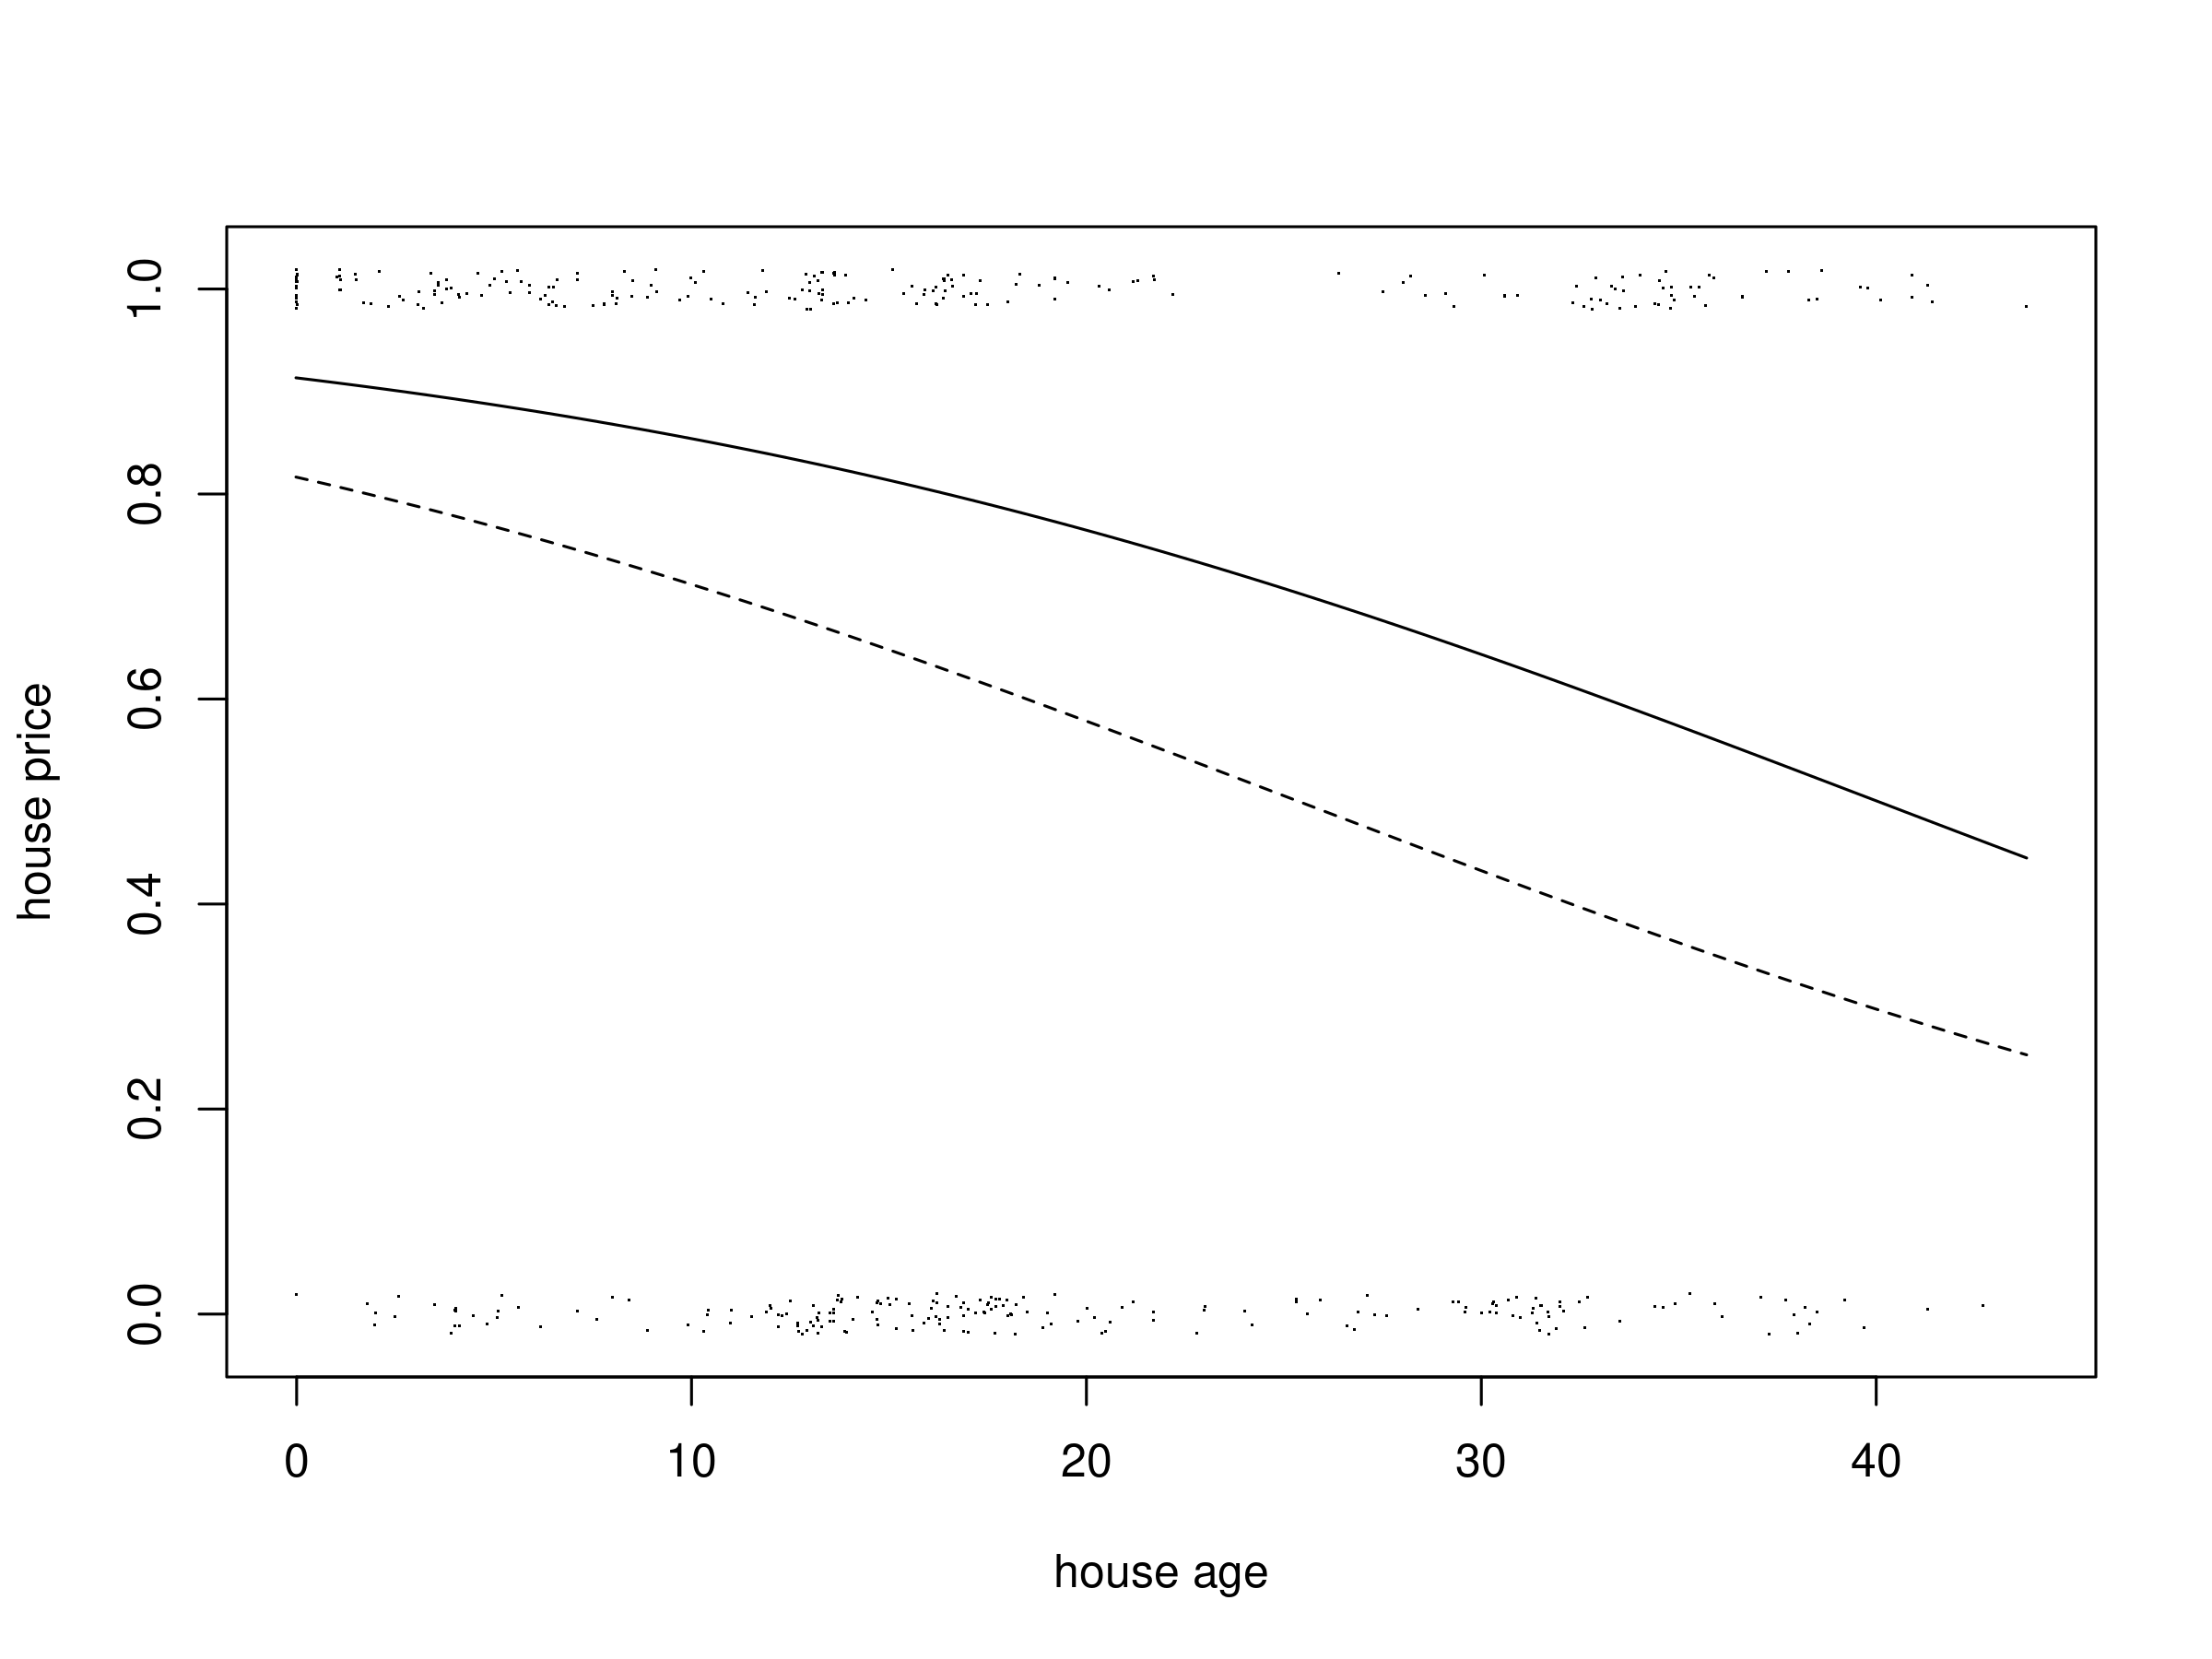

In [24]:
plot(jitter(Y1,0.1) ~ jitter(X2), df, xlab="house age", ylab="house price",pch=".")
curve(ilogit(beta[1] + beta[2]*x + beta[3]*100 + beta[4]*mean(df$X4) + beta[5]*mean(df$X5)),add=TRUE)      
curve(ilogit(beta[1] + beta[2]*x + beta[3]*500 + beta[4]*mean(df$X4) + beta[5]*mean(df$X5)),add=TRUE,lty=2)

**house price**

가장 가까운 지하철 역까지의 거리가 100인 집단의 $\hat{\beta}_2$ <0

$\hat{\beta}_0 + \hat{\beta}_1 \times X_2 + \hat{\beta}_2 \times 100 \hat + {\beta}_3 \times \bar{X_4} + \hat{\beta}_4 \times \bar{X_5}$

가장 가까운 지하철 역까지의 거리가 500인 집단의 $\hat{\beta}_2$ <0

$\hat{\beta}_0 + \hat{\beta}_1 \times X_2 + \hat{\beta}_2 \times 500 + \hat{\beta}_3 \times \bar{X_4} + \hat{\beta}_4 \times \bar{X_5}$

- 집이 지은지 오래될수록 집값이 떨어지는 경향을 보였다.
- 특히 가장 가까운 지하철 역까지의 거리가 100일때보다 500일 때 집값이 더 빨리 감소하는 경향을 보였다.
- X2(house age)와 Y는 음의 상관관계에 있다.

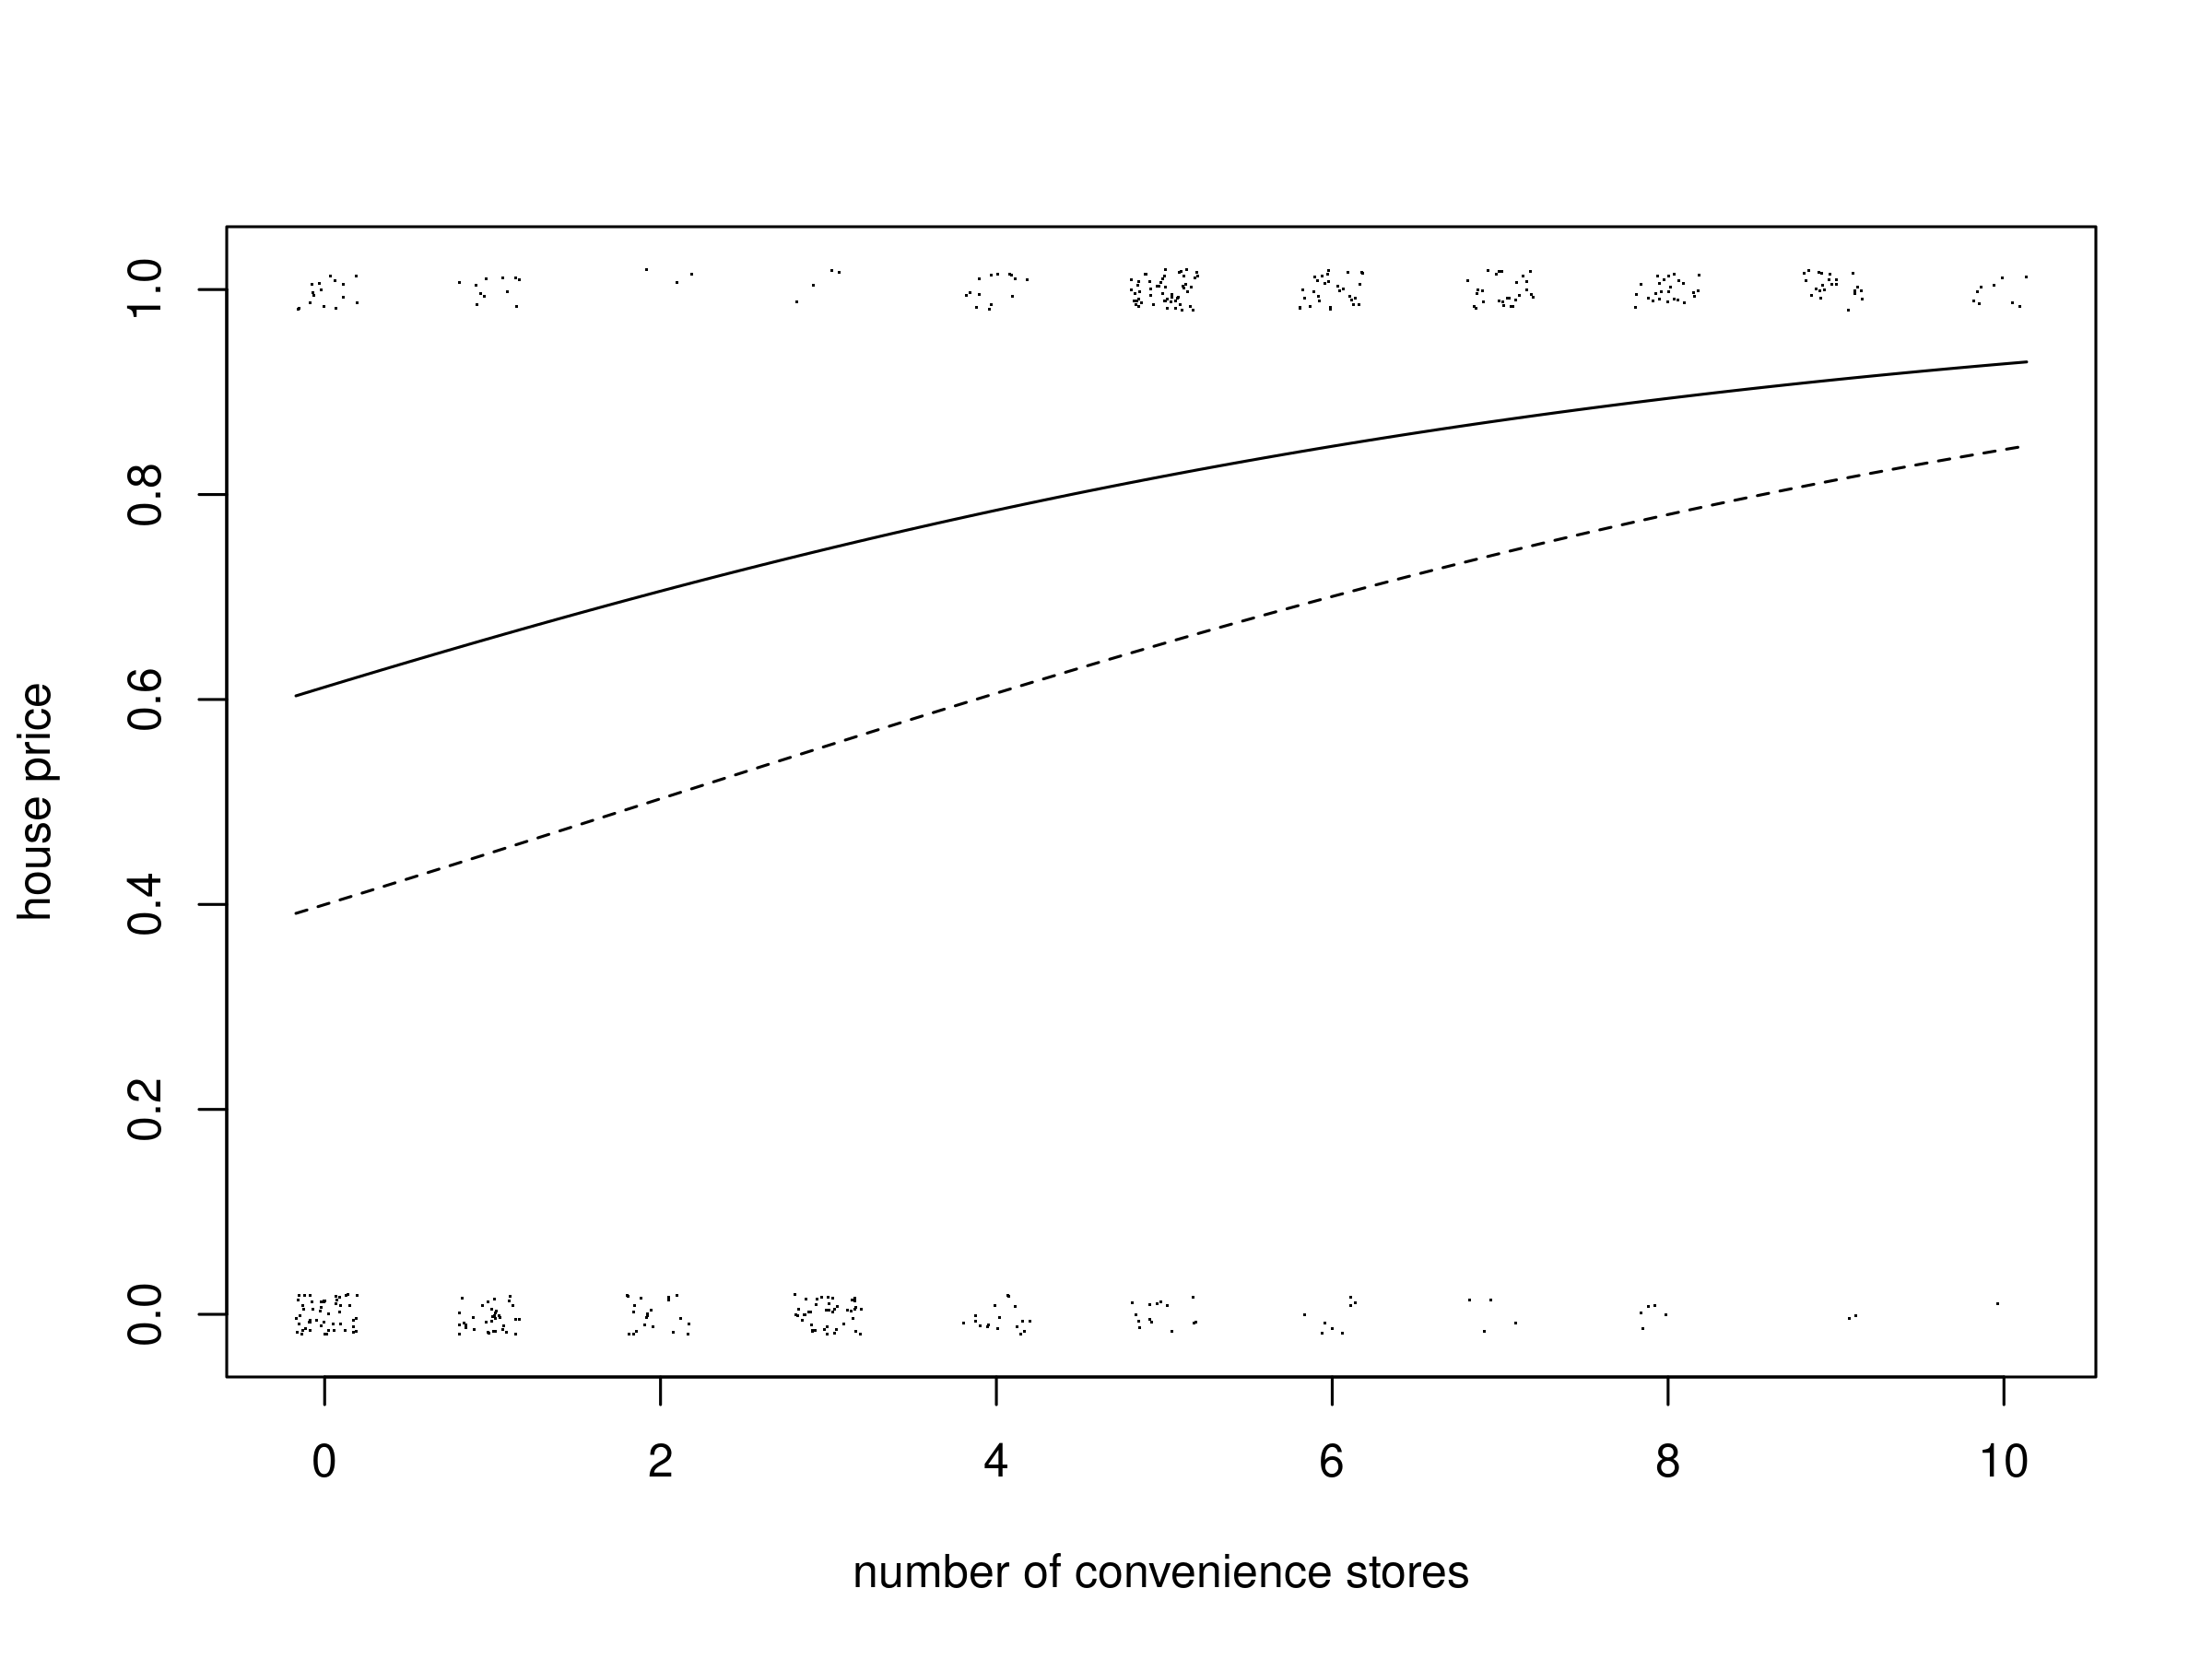

In [25]:
plot(jitter(Y1,0.1) ~ jitter(X4), df, xlab="number of convenience stores", ylab="house price",pch=".")
curve(ilogit(beta[1] + beta[2]*mean(df$X2) + beta[3]*100 + beta[4]*x + beta[5]*mean(df$X5)),add=TRUE)      
curve(ilogit(beta[1] + beta[2]*mean(df$X2) + beta[3]*500 + beta[4]*x + beta[5]*mean(df$X5)),add=TRUE,lty=2)

**number of convenience stores**

가장 가까운 지하철 역까지의 거리가 100인 집단의 $\hat{\beta}_4$ >0

$\hat{\beta}_0 + \hat{\beta}_1 \times \bar{X_2} + \hat{\beta}_2 \times 100 \hat + {\beta}_3 \times X_4 + \hat{\beta}_4 \times \bar{X_5}$

가장 가까운 지하철 역까지의 거리가 500인 집단의 $\hat{\beta}_4$ >0

$\hat{\beta}_0 + \hat{\beta}_1 \times \bar{X_2} + \hat{\beta}_2 \times 500 + \hat{\beta}_3 \times X_4 + \hat{\beta}_4 \times \bar{X_5}$

- 집 주변에 편의점이 많다면 집값이 상승하는 경향을 보였다.
- 또한 집 주변 편의점이 많아도 지하철 역이 멀면 집값이 느리게 증가하는 경향을 보였다.
    - 100일때보다 500일때 기울기가 더 완만하게 증가하는 모양
- X4(number of convenience stores)와 Y는 양의 상관관계에 있다.

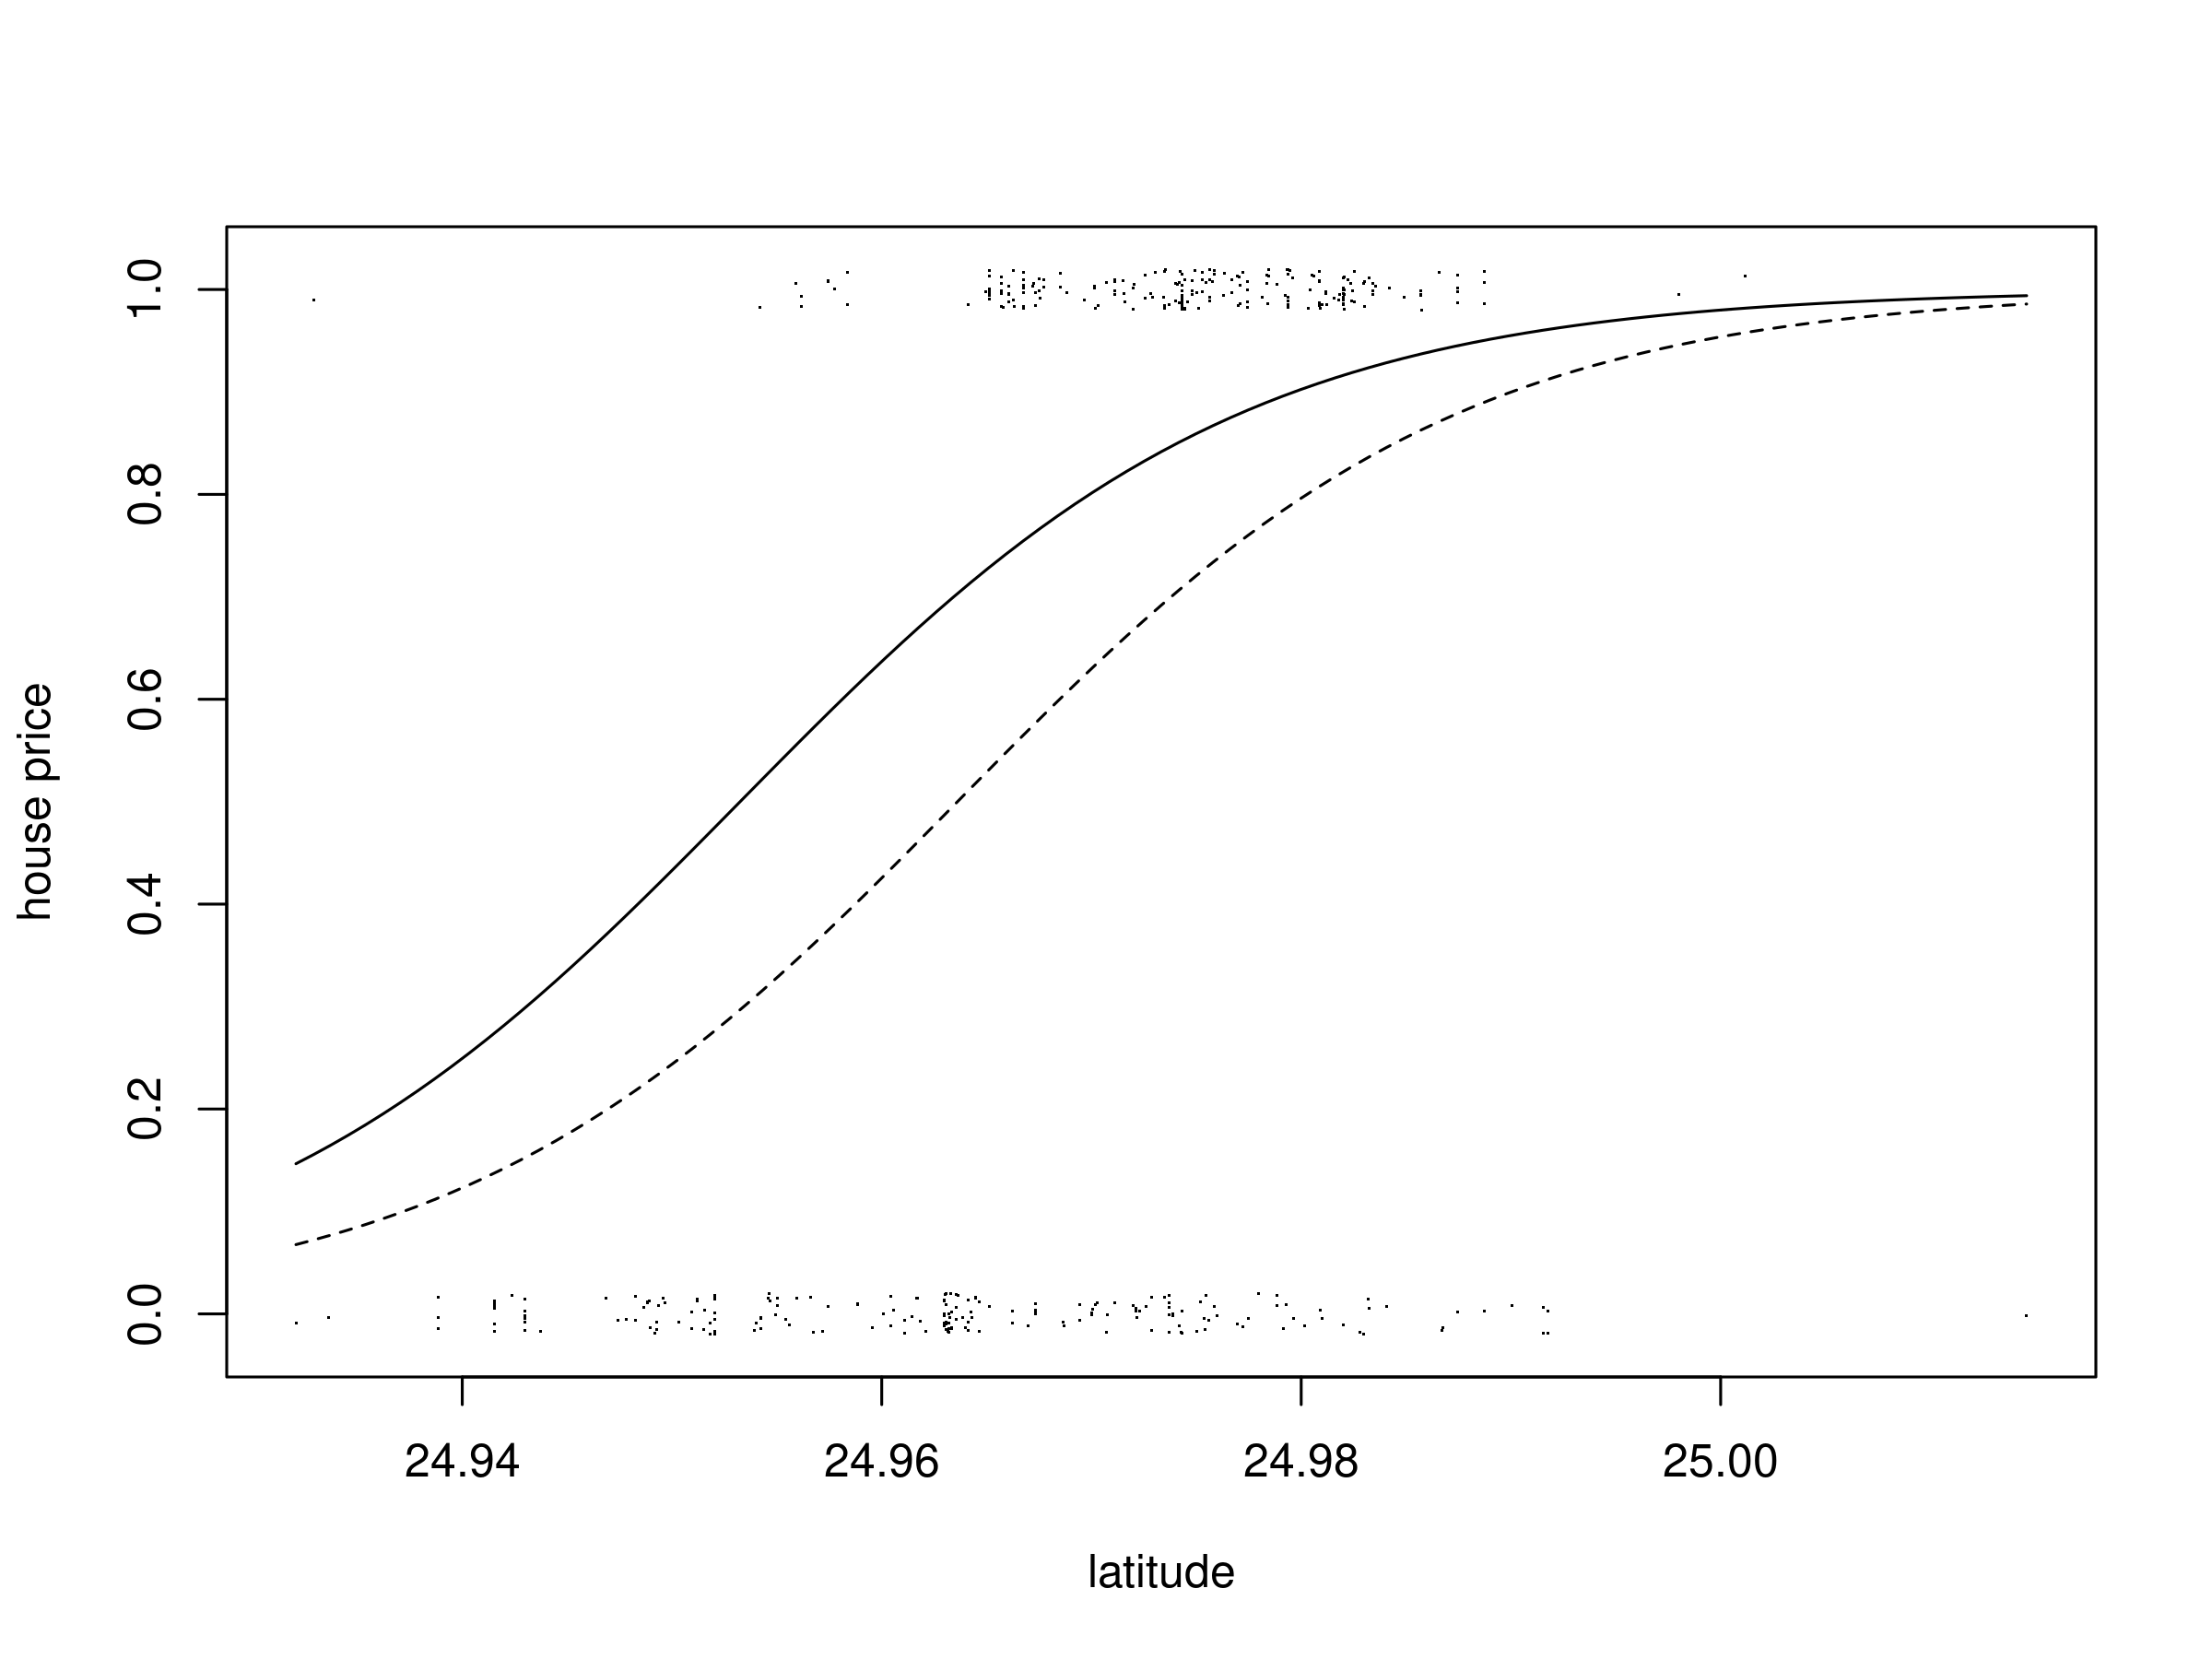

In [26]:
plot(jitter(Y1,0.1) ~ jitter(X5), df, xlab="latitude", ylab="house price",pch=".")
curve(ilogit(beta[1] + beta[2]*mean(df$X2) + beta[3]*100 + beta[4]*mean(df$X4) + beta[5]*x),add=TRUE)      
curve(ilogit(beta[1] + beta[2]*mean(df$X2) + beta[3]*500 + beta[4]*mean(df$X4) + beta[5]*x),add=TRUE,lty=2)

**latitude**

가장 가까운 지하철 역까지의 거리가 100인 집단의 $\hat{\beta}_5$ >0

$\hat{\beta}_0 + \hat{\beta}_1 \times \bar{X_2} + \hat{\beta}_2 \times 100 \hat + {\beta}_3 \times X_4 + \hat{\beta}_4 \times \bar{X_5}$

가장 가까운 지하철 역까지의 거리가 500인 집단의 $\hat{\beta}_5$ >0

$\hat{\beta}_0 + \hat{\beta}_1 \times \bar{X_2} + \hat{\beta}_2 \times 500 + \hat{\beta}_3 \times X_4 + \hat{\beta}_4 \times \bar{X_5}$

- 위도가 높아질수록 집값이 상승하는 경향을 보였으며,
- 집과 가장 가까운 지하철 역까지의 거리가 100일떄보다 500일때, 즉 집에서 멀어질때 집값이 비교적 느리게 증가하는 경향이 보였다.
- X5(latitude)와 Y는 양의 상관관계에 있다.

In [27]:
c(ilogit(sum(beta*c(1,mean(df$X2),100,mean(df$X4),mean(df$X5)))),
  ilogit(sum(beta*c(1,mean(df$X2),500,mean(df$X4),mean(df$X5)))))

[1] 0.7880203 0.6108421

In [28]:
ilogit(sum(beta*c(1,mean(df$X2),100,mean(df$X4),mean(df$X5))))/
ilogit(sum(beta*c(1,mean(df$X2),500,mean(df$X4),mean(df$X5))))

[1] 1.290056

집에서 가장 가까운 지하철까지의 거리가 100일 때가 가장 가까운 지하철까지의 거리가 500일 때보다 집값이 1.29배 정도 높다.

## 5. 국소상수, 국소선형 추정량을 각각 적합하고 평가하여라.

국소상수

데이터를 정렬하지 않았더니 추정곡선의 방향성이 일정하지 않아 X3 변수를 기준으로 정렬해주었다.

In [29]:
df1 = df[order(df$X3),]

정렬된 모습 확인

In [30]:
head(df)

,No,X1,X2,X3,X4,X5,X6,Y,Y1
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9,0
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2,1
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3,1
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8,1
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1,1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1,0


In [31]:
head(df1)

,No,X1,X2,X3,X4,X5,X6,Y,Y1
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,2012.667,1.5,23.38284,7,24.96772,121.5410,47.7,1
276,276,2012.667,1.5,23.38284,7,24.96772,121.5410,49.7,1
161,161,2012.917,3.5,49.66105,8,24.95836,121.5376,57.8,1
378,378,2013.333,3.9,49.66105,8,24.95836,121.5376,56.8,1
58,58,2012.917,3.5,56.47425,7,24.95744,121.5371,53.5,1
292,292,2012.833,3.4,56.47425,7,24.95744,121.5371,54.4,1


In [32]:
nw <- npreg(log(df1$Y) ~ df1$X3, regtype = "lc")

In [33]:
nw


Regression Data: 414 training points, in 1 variable(s)
               df1$X3
Bandwidth(s): 14.8441

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


국소선형

In [34]:
ll <- npreg(log(df1$Y) ~ df1$X3,regtype="ll")

In [35]:
ll


Regression Data: 414 training points, in 1 variable(s)
                df1$X3
Bandwidth(s): 98.59427

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


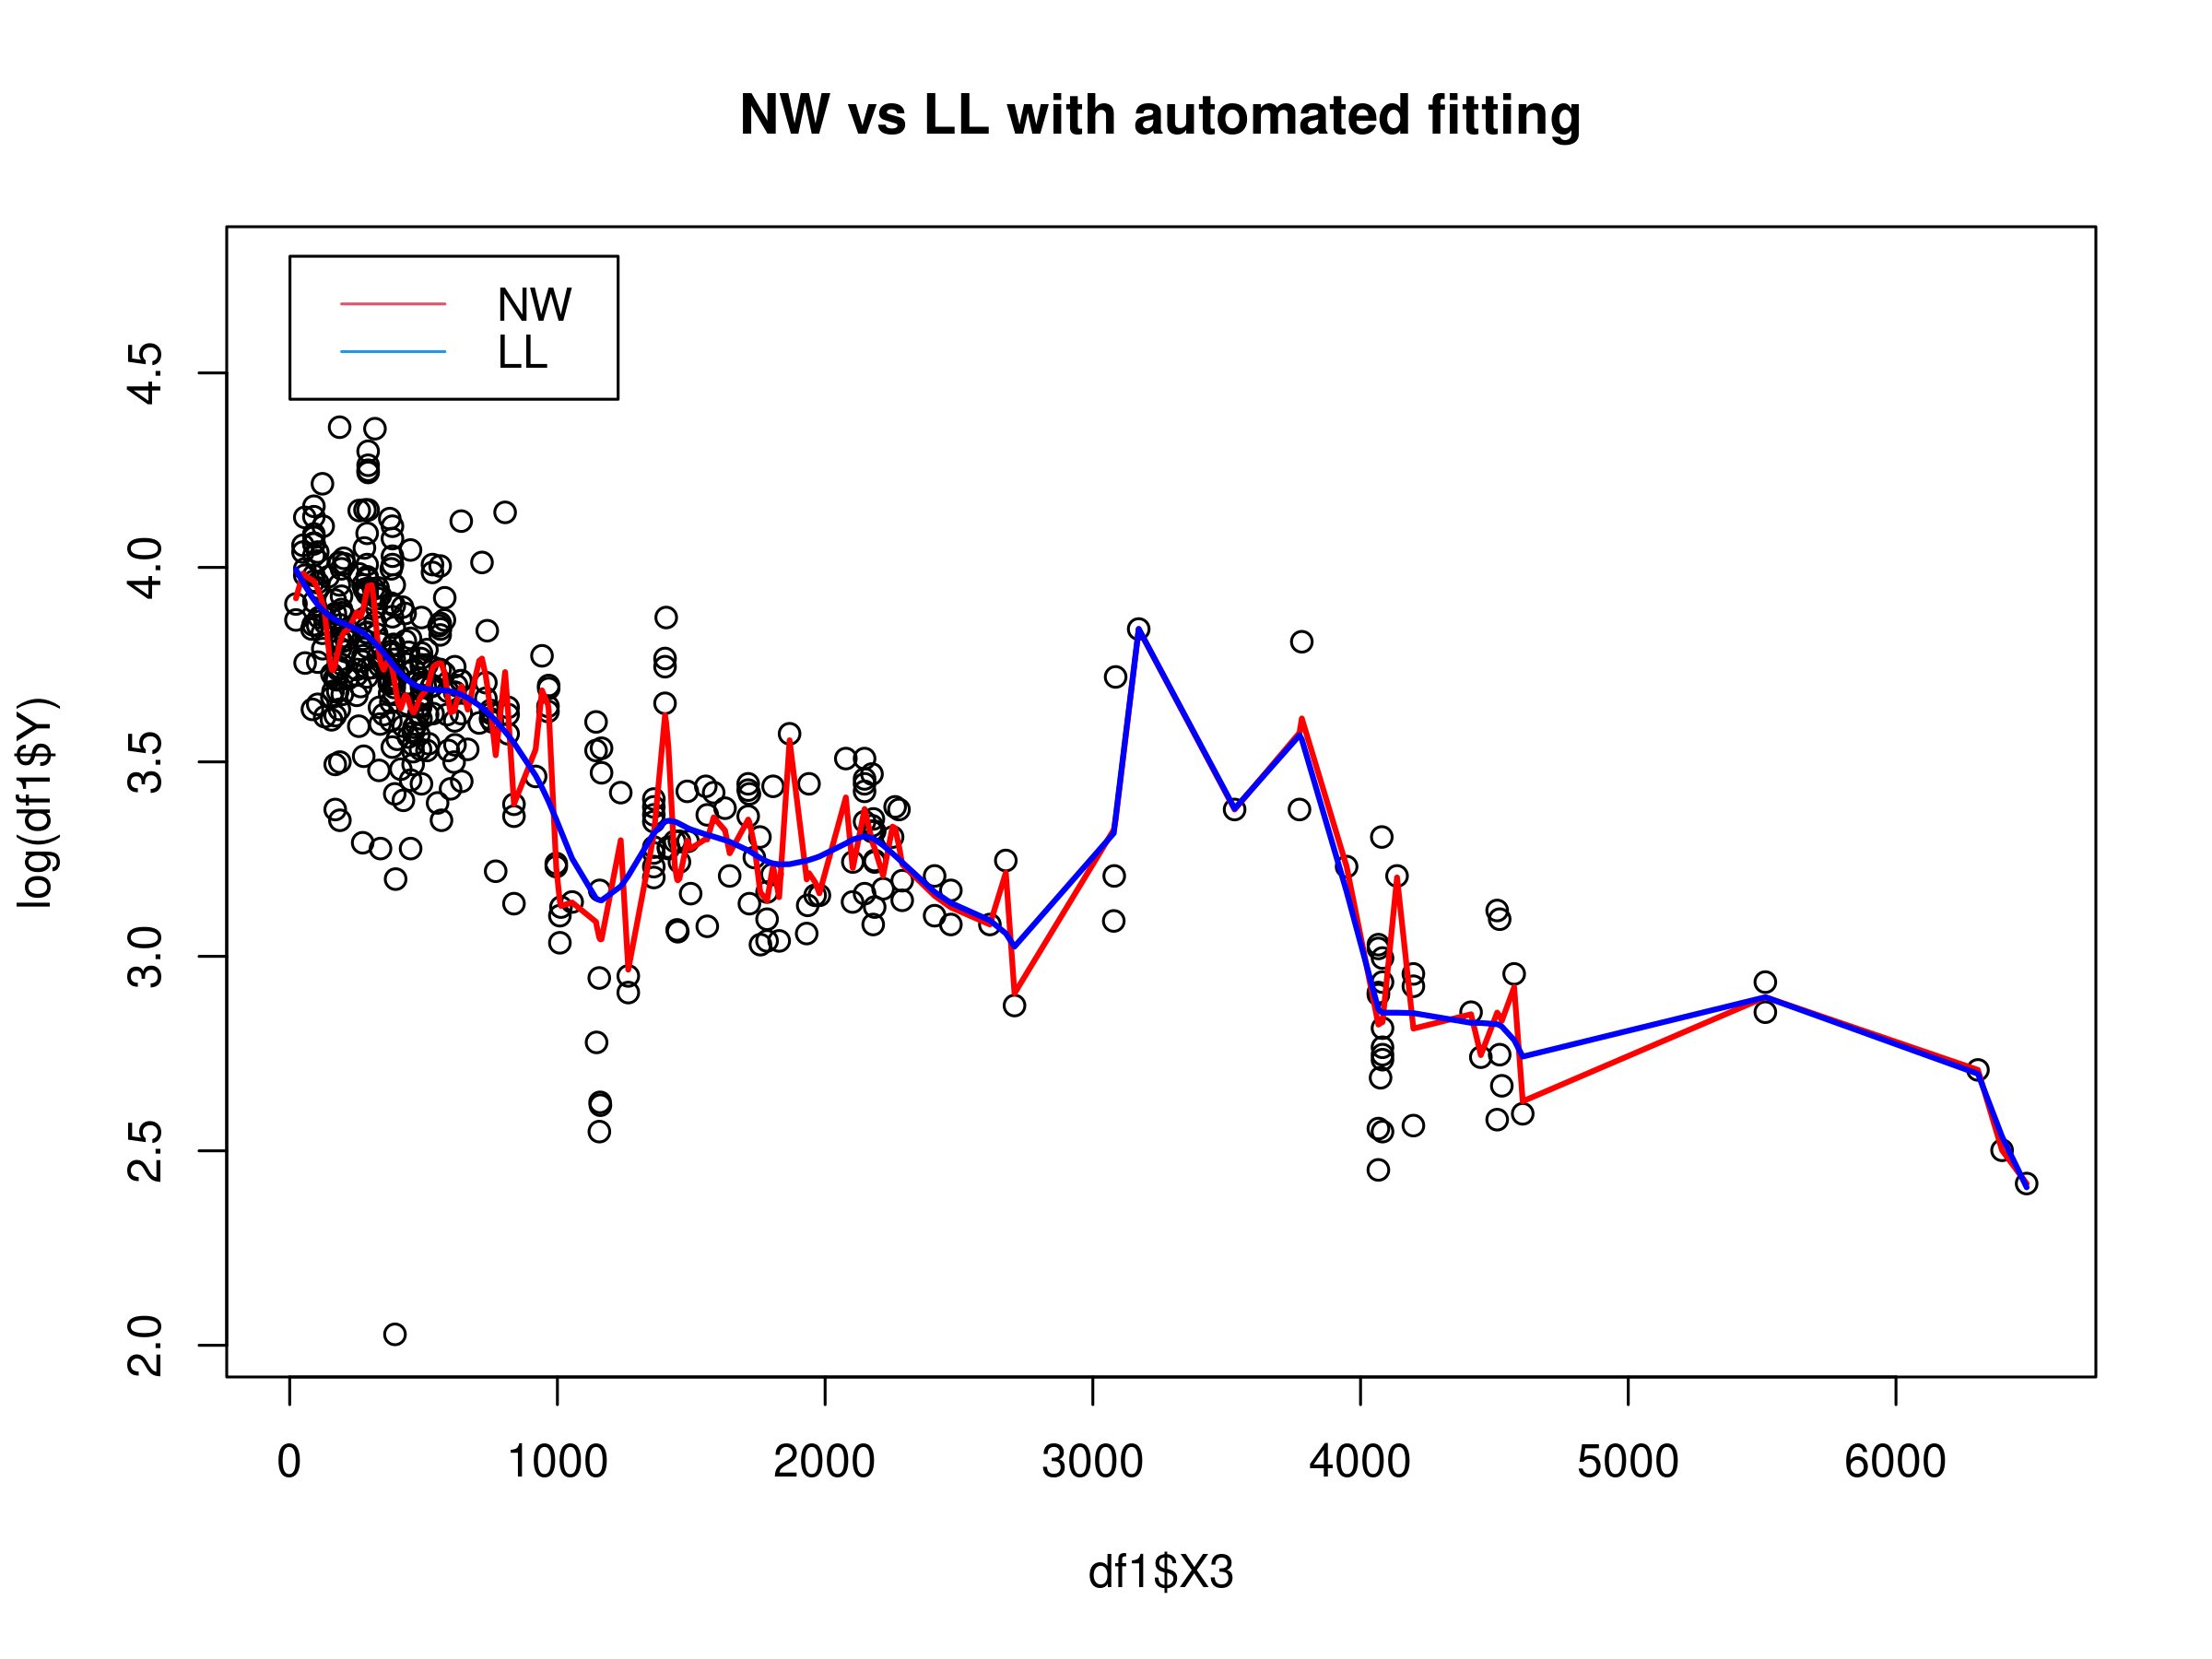

In [36]:
plot(df1$X3,log(df1$Y),main="NW vs LL with automated fitting")
lines(df1$X3 ,nw$mean,col="red",lwd=2)
lines(df1$X3 ,ll$mean,col="blue",lwd=2)
legend(1,4.8,c("NW","LL"),col=c(2,12),lty=c(1,1))

In [37]:
cat("automated fitting\n",
    "Error of Local-Constant",sum((log(df1$Y) - nw$mean)**2),"\n",
    "Error of Local-Linear",sum((log(df1$Y) - ll$mean)**2))

automated fitting
 Error of Local-Constant 15.23725 
 Error of Local-Linear 19.40904

- 커널 함수는 Gaussian 커널이 사용되었고, 평활모수 h(bandwidth)는 Local-Constant에서 `14.8441`, Local-Linear에서 `98.59427`이 자동으로 선택되었다.
- 국소 상수에 비해 국소 선형의 가중치가 멀리 있는 관측치에도 가중치가 크게 부여되었다.
- 국소 상수에 비해 국소 선형이 상대적으로 부드러운 추정곡선이 생성되었고, 국소 상수가 더 민감한 변화가 있는 추정곡선이 생성된 모습을 확인할 수 있었다.
- 최소제곱합을 계산해보니 국소 상수 추정량에 비해 국소 선형 추정량의 error값이 조금 크다는 것을 확인할 수 있었다.

**h 300 vs h 100**

국소상수

In [38]:
nw1 <- npreg(log(df1$Y) ~ df1$X3, regtype = "lc",bws=300)
nw2 <- npreg(log(df1$Y) ~ df1$X3, regtype = "lc",bws=100)

국소선형

In [39]:
ll1 <- npreg(log(df1$Y) ~ df1$X3,regtype="ll",bws=300)
ll2 <- npreg(log(df1$Y) ~ df1$X3,regtype="ll",bws=100)

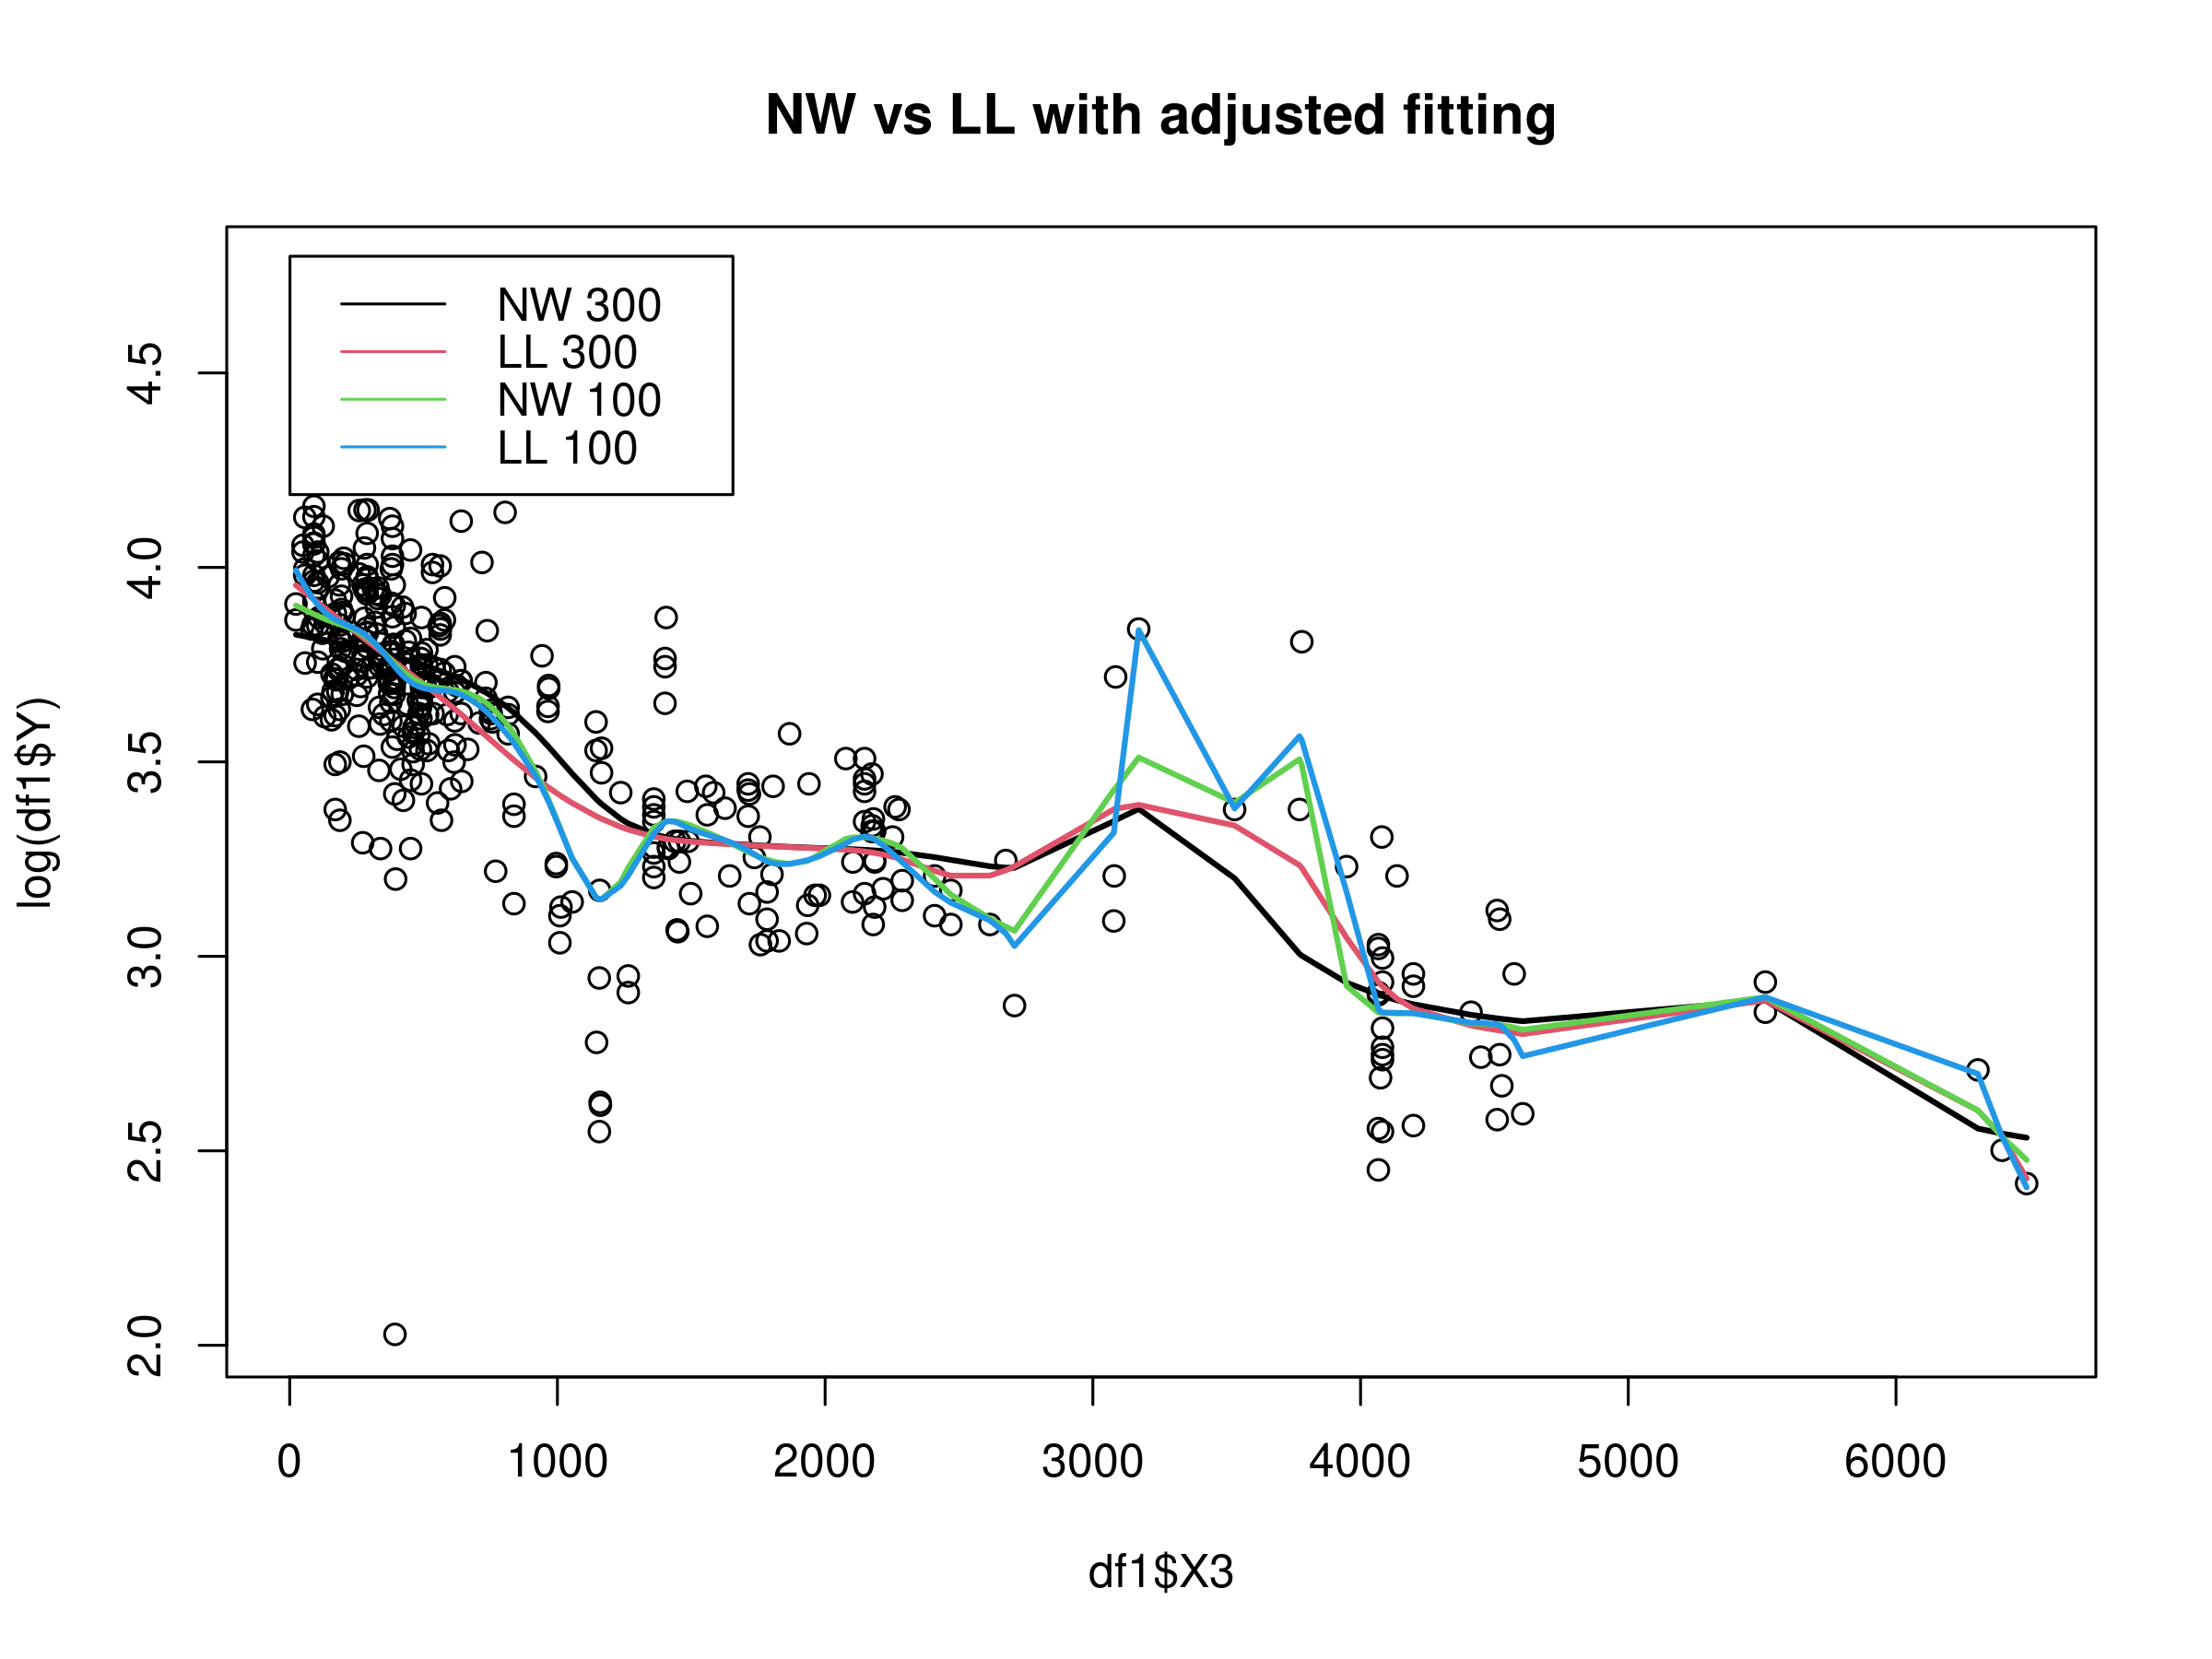

In [40]:
plot(df1$X3,log(df1$Y),main="NW vs LL with adjusted fitting")
lines(df1$X3 ,nw1$mean,col=1,lwd=2)
lines(df1$X3 ,ll1$mean,col=2,lwd=2)
lines(df1$X3 ,nw2$mean,col=3,lwd=2)
lines(df1$X3 ,ll2$mean,col=4,lwd=2)
legend(1,4.8,c("NW 300","LL 300","NW 100","LL 100"),col=c(1,2,3,4),lty=c(1,1))

In [41]:
cat("automated fitting\n","Error of Local-Constant, h = 300 :",sum((log(df1$Y) - nw1$mean)**2),"\n",
    "Error of Local-Linear, h = 300 :",sum((log(df1$Y) - ll1$mean)**2),"\n",
    "Error of Local-Constant, h = 100 :",sum((log(df1$Y) - nw2$mean)**2),"\n",
    "Error of Local-Linear, h = 100 :",sum((log(df1$Y) - ll2$mean)**2))

automated fitting
 Error of Local-Constant, h = 300 : 23.4653 
 Error of Local-Linear, h = 300 : 21.74791 
 Error of Local-Constant, h = 100 : 19.9467 
 Error of Local-Linear, h = 100 : 19.4329

- 커널 함수는 Gaussian 커널이 사용되었고, 평활모수 h(bandwidth)는 Local-Constant과 Local-Linear에서 300, 100을 선택하여 비교하여 보았다.
- h가 300일때보다 100일때 더 민감하게 변화하는 추정곡선의 모습을 볼 수 있었으며,
- 그렇다보니 오차 제곱합도 h가 100일때 더 값이 작은 결과가 나왔다는 것을 확인할 수 있었다.

**Gaussian vs Epanechnikov**

국소상수

In [42]:
nw3 <- npreg(log(df1$Y) ~ df1$X3, regtype = "lc")
nw4 <- npreg(log(df1$Y) ~ df1$X3, regtype = "lc",ckertype="epanechnikov")

In [43]:
nw3


Regression Data: 414 training points, in 1 variable(s)
               df1$X3
Bandwidth(s): 14.8441

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


In [44]:
nw4


Regression Data: 414 training points, in 1 variable(s)
                df1$X3
Bandwidth(s): 109.6745

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Epanechnikov
No. Continuous Explanatory Vars.: 1


국소선형

In [45]:
ll3 <- npreg(log(df1$Y) ~ df1$X3,regtype="ll")
ll4 <- npreg(log(df1$Y) ~ df1$X3,regtype="ll",ckertype="epanechnikov")

In [46]:
ll3


Regression Data: 414 training points, in 1 variable(s)
                df1$X3
Bandwidth(s): 98.59427

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


In [47]:
ll4


Regression Data: 414 training points, in 1 variable(s)
                df1$X3
Bandwidth(s): 160.3659

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Epanechnikov
No. Continuous Explanatory Vars.: 1


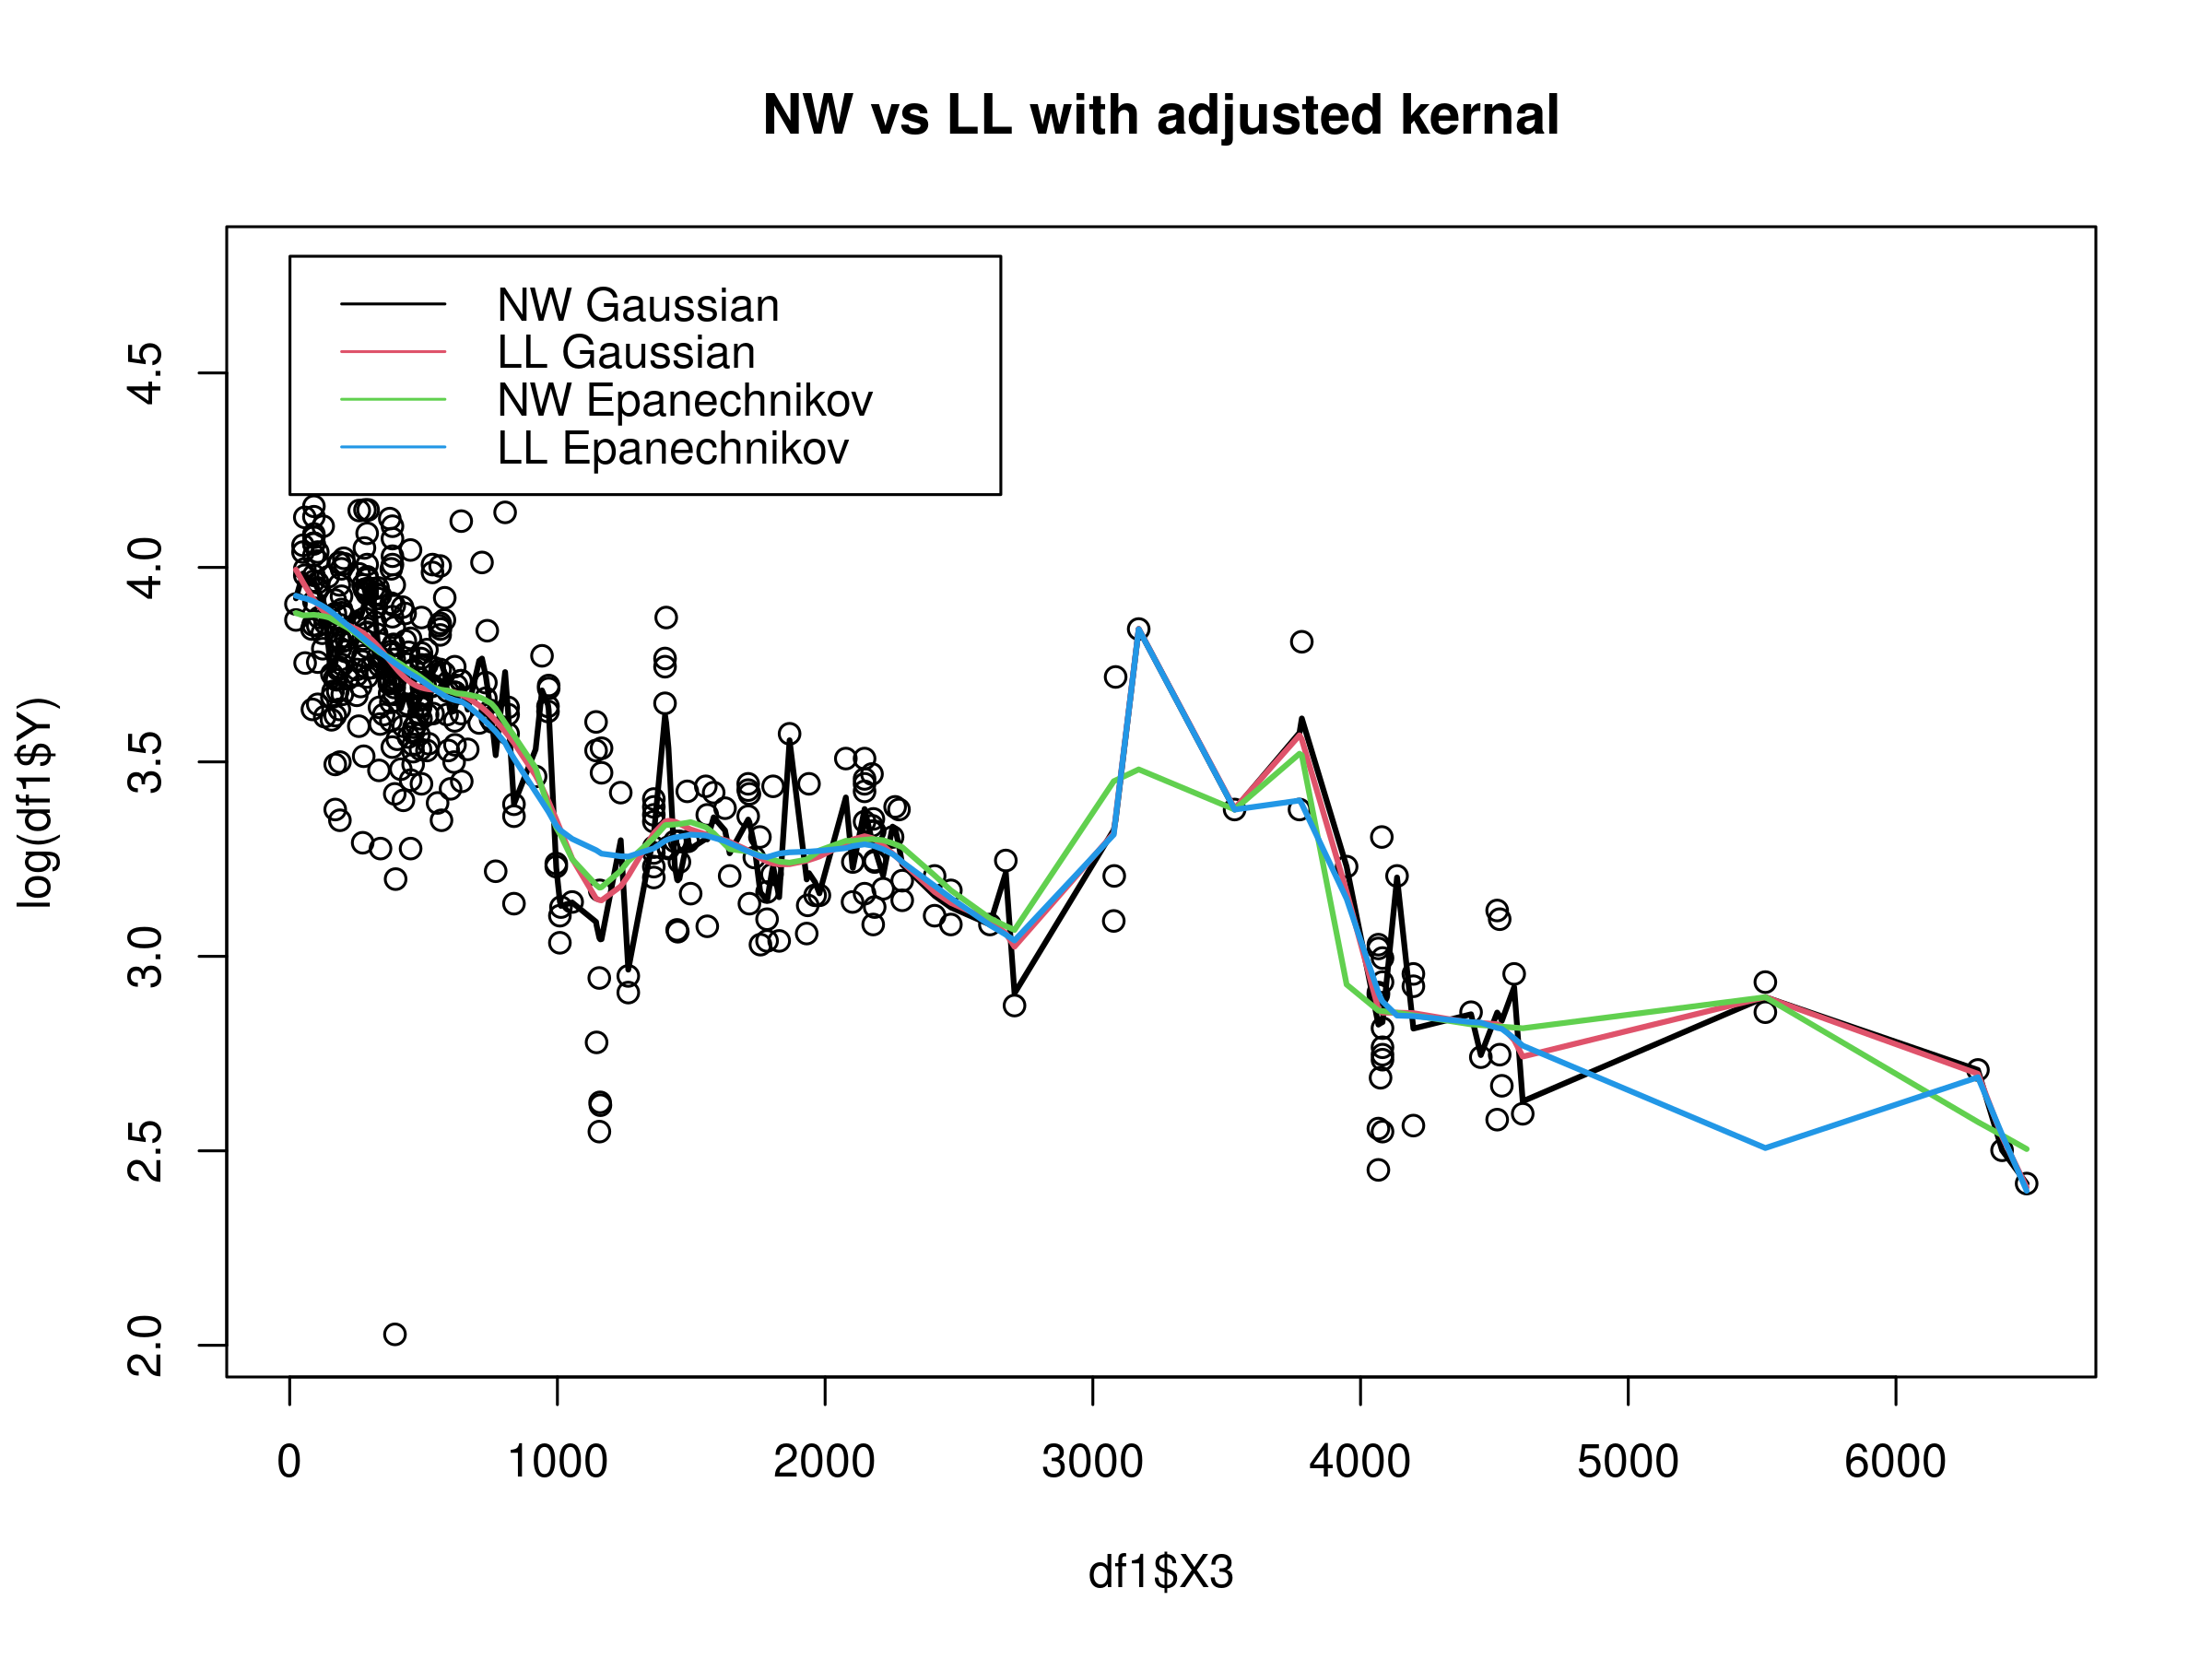

In [48]:
plot(df1$X3,log(df1$Y),main="NW vs LL with adjusted kernal")
lines(df1$X3 ,nw3$mean,col=1,lwd=2)
lines(df1$X3 ,ll3$mean,col=2,lwd=2)
lines(df1$X3 ,nw4$mean,col=3,lwd=2)
lines(df1$X3 ,ll4$mean,col=4,lwd=2)
legend(1,4.8,c("NW Gaussian","LL Gaussian","NW Epanechnikov","LL Epanechnikov"),col=c(1,2,3,4),lty=c(1,1))

In [49]:
cat("automated fitting and different kernel\n",
    "Error of Local-Constant with Gaussian :",sum((log(df1$Y) - nw3$mean)**2),"\n",
    "Error of Local-Linear with Gaussian :",sum((log(df1$Y) - ll3$mean)**2),"\n",
    "Error of Local-Constant with Epanechnikov :",sum((log(df1$Y) - nw4$mean)**2),"\n",
    "Error of Local-Linear with Epanechnikov :",sum((log(df1$Y) - ll4$mean)**2))

automated fitting and different kernel
 Error of Local-Constant with Gaussian : 15.23725 
 Error of Local-Linear with Gaussian : 19.40904 
 Error of Local-Constant with Epanechnikov : 20.35949 
 Error of Local-Linear with Epanechnikov : 20.77761

- 커널 함수는 Gaussian 커널과 Epanechnikov을 사용했고, 평활모수 h(bandwidth)는 Local-Constant과 Local-Linear에서 자동으로 선택하도록 비교하여 보았다.
- error의 최소제곱값을 구해보니
    - Local-Constant에서 오차값은 Gaussian 커널보다 Epanechnikov 커널에서 더 큰 값이 나왔다.
    - Local-Linear에서 오차값은 Gaussian 커널과 Epanechnikov 커널이 거의 비슷했다.